In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [183]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

Observations:

The dataset contains 7752 rows and 25 columns.

It has two labels namely "Next_Tmax" and "Next_Tmin".

Both "Next_Tmax" and "Next_Tmin" are continuous variables so, the prediction of both the labels are regression problems.

In [184]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [185]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

# Exploratory Data Analysis (EDA)

In [186]:
df.shape

(7752, 25)

In [187]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Observations:

One column is of object data type and all others are of float data type.

The data type of "Date" columm is object but it should be datetime.

In [189]:
#Check null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can observe that there are some null values in some columns.

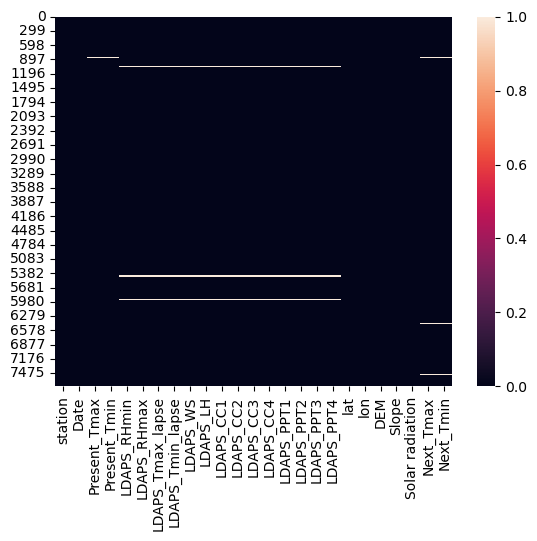

In [190]:
#Visulaize null values
sns.heatmap(df.isnull())
plt.show()

We can also visualize that there are some null values in the dataset.

In [191]:
#Check the counts of unique values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
        

We can see that all the columns except "station" and "Date" contain continuous data.

In [192]:
#Convert the data type of "Date" column and split it into day, month and year columns
df["Date"]=pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   
7750      NaN        NaT          20.0          11.3    19.794666   
7751      NaN        NaT          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...      lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.785000      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.514100      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.266100      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.534800      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.505500      5859.552246       31.2   
...   ...      ...      ...       ...       ...              ...        ...   
7747  ...  37.5372  126.891   15.5876  0.155400      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.222300      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.271300      4451.345215       27.8   
7750  ...  37.4562  126.826   12.3700  0.098475      4329.520508       17.4   
7751  ...  37.6450  127.135  212.3350  5.178230      5992.895996       38.9   

      Next_Tmin   Day  Month    Year  
0          21.2  30.0    6.0  2013.0  
1          22.5  30.0    6.0  2013.0  
2          23.9  30.0    6.0  2013.0  
3          24.3  30.0    6.0  2013.0  
4          22.5  30.0    6.0  2013.0  
...         ...   ...    ...     ...  
7747       18.1  30.0    8.0  2017.0  
7748       18.8  30.0    8.0  2017.0  
7749       17.4  30.0    8.0  2017.0  
7750       11.3   NaN    NaN     NaN  
7751       29.8   NaN    NaN     NaN  

[7752 rows x 28 columns]

In [193]:
# Drop the "Date" column as it is  useless now
df.drop("Date",axis=1,inplace=True)
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      NaN          20.0          11.3    19.794666    58.936283   
7751      NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...      lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.785000      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.514100      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.266100      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.534800      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.505500      5859.552246       31.2   
...   ...      ...      ...       ...       ...              ...        ...   
7747  ...  37.5372  126.891   15.5876  0.155400      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.222300      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.271300      4451.345215       27.8   
7750  ...  37.4562  126.826   12.3700  0.098475      4329.520508       17.4   
7751  ...  37.6450  127.135  212.3350  5.178230      5992.895996       38.9   

      Next_Tmin   Day  Month    Year  
0          21.2  30.0    6.0  2013.0  
1          22.5  30.0    6.0  2013.0  
2          23.9  30.0    6.0  2013.0  
3          24.3  30.0    6.0  2013.0  
4          22.5  30.0    6.0  2013.0  
...         ...   ...    ...     ...  
7747       18.1  30.0    8.0  2017.0  
7748       18.8  30.0    8.0  2017.0  
7749       17.4  30.0    8.0  2017.0  
7750       11.3   NaN    NaN     NaN  
7751       29.8   NaN    NaN     NaN  

[7752 rows x 27 columns]

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


We can see that, after adding the "Day", "Month" and "Year" columns and dropping the "Date" column, we have now 27 columns and all are of float data type.

We will first check how much data loss will be there if we drop all the rows where there are null values.

In [195]:
df1=df.dropna()
df1.shape

(7588, 27)

In [196]:
df.shape

(7752, 27)

In [197]:
data_loss_percentage=(df.shape[0]-df1.shape[0])/df.shape[0]*100
data_loss_percentage

2.1155830753353975

There will be only 2.12% of data loss after dropping the rows where there are null values. This is acceptable so, we will drop all the rows where there are null values.

In [198]:
df.dropna(inplace=True)

In [199]:
df.shape

(7588, 27)

After removing the null values we have 7588 rows and 27 columns in the dataset.

In [200]:
#Check if there are any duplicate rows
df.duplicated().value_counts()

False    7588
dtype: int64

We can see that there are no duplicate rows in the dataset.

In [201]:
#Check null values again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

We can observe that now there are no null values in the dataset.

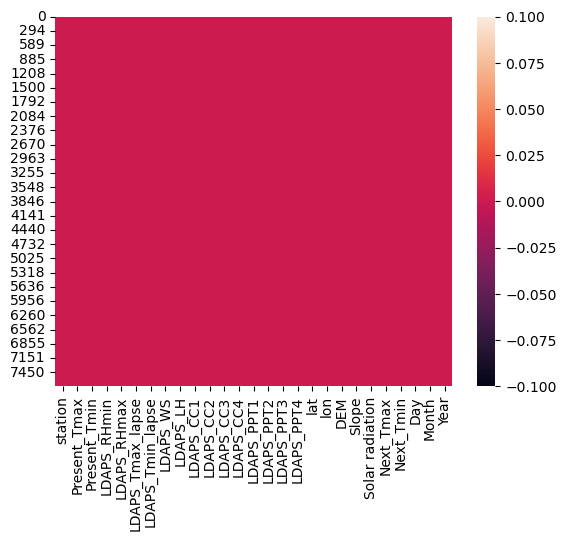

In [202]:
#Visualize null values again
sns.heatmap(df.isnull())
plt.show()

We can also clearly visualize that there are no null values in the dataset.

In [203]:
#Separate continuous and categorical columns
categorical_col=["station","Day","Month","Year"]
continuous_col=[i for i in df.columns if i not in categorical_col]
print("Continuous columns: ",continuous_col)
print("\n")
print("Categorical columns: ",categorical_col)

Continuous columns:  ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


Categorical columns:  ['station', 'Day', 'Month', 'Year']


In [204]:
#Statistical summary of numerical columns
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

Observations:

There are no null values in the dataset.

Most of the columns do not have skewness as the mean is almost equal to the median (50%) in these columns.

# Data Visualization

Univariate Analysis

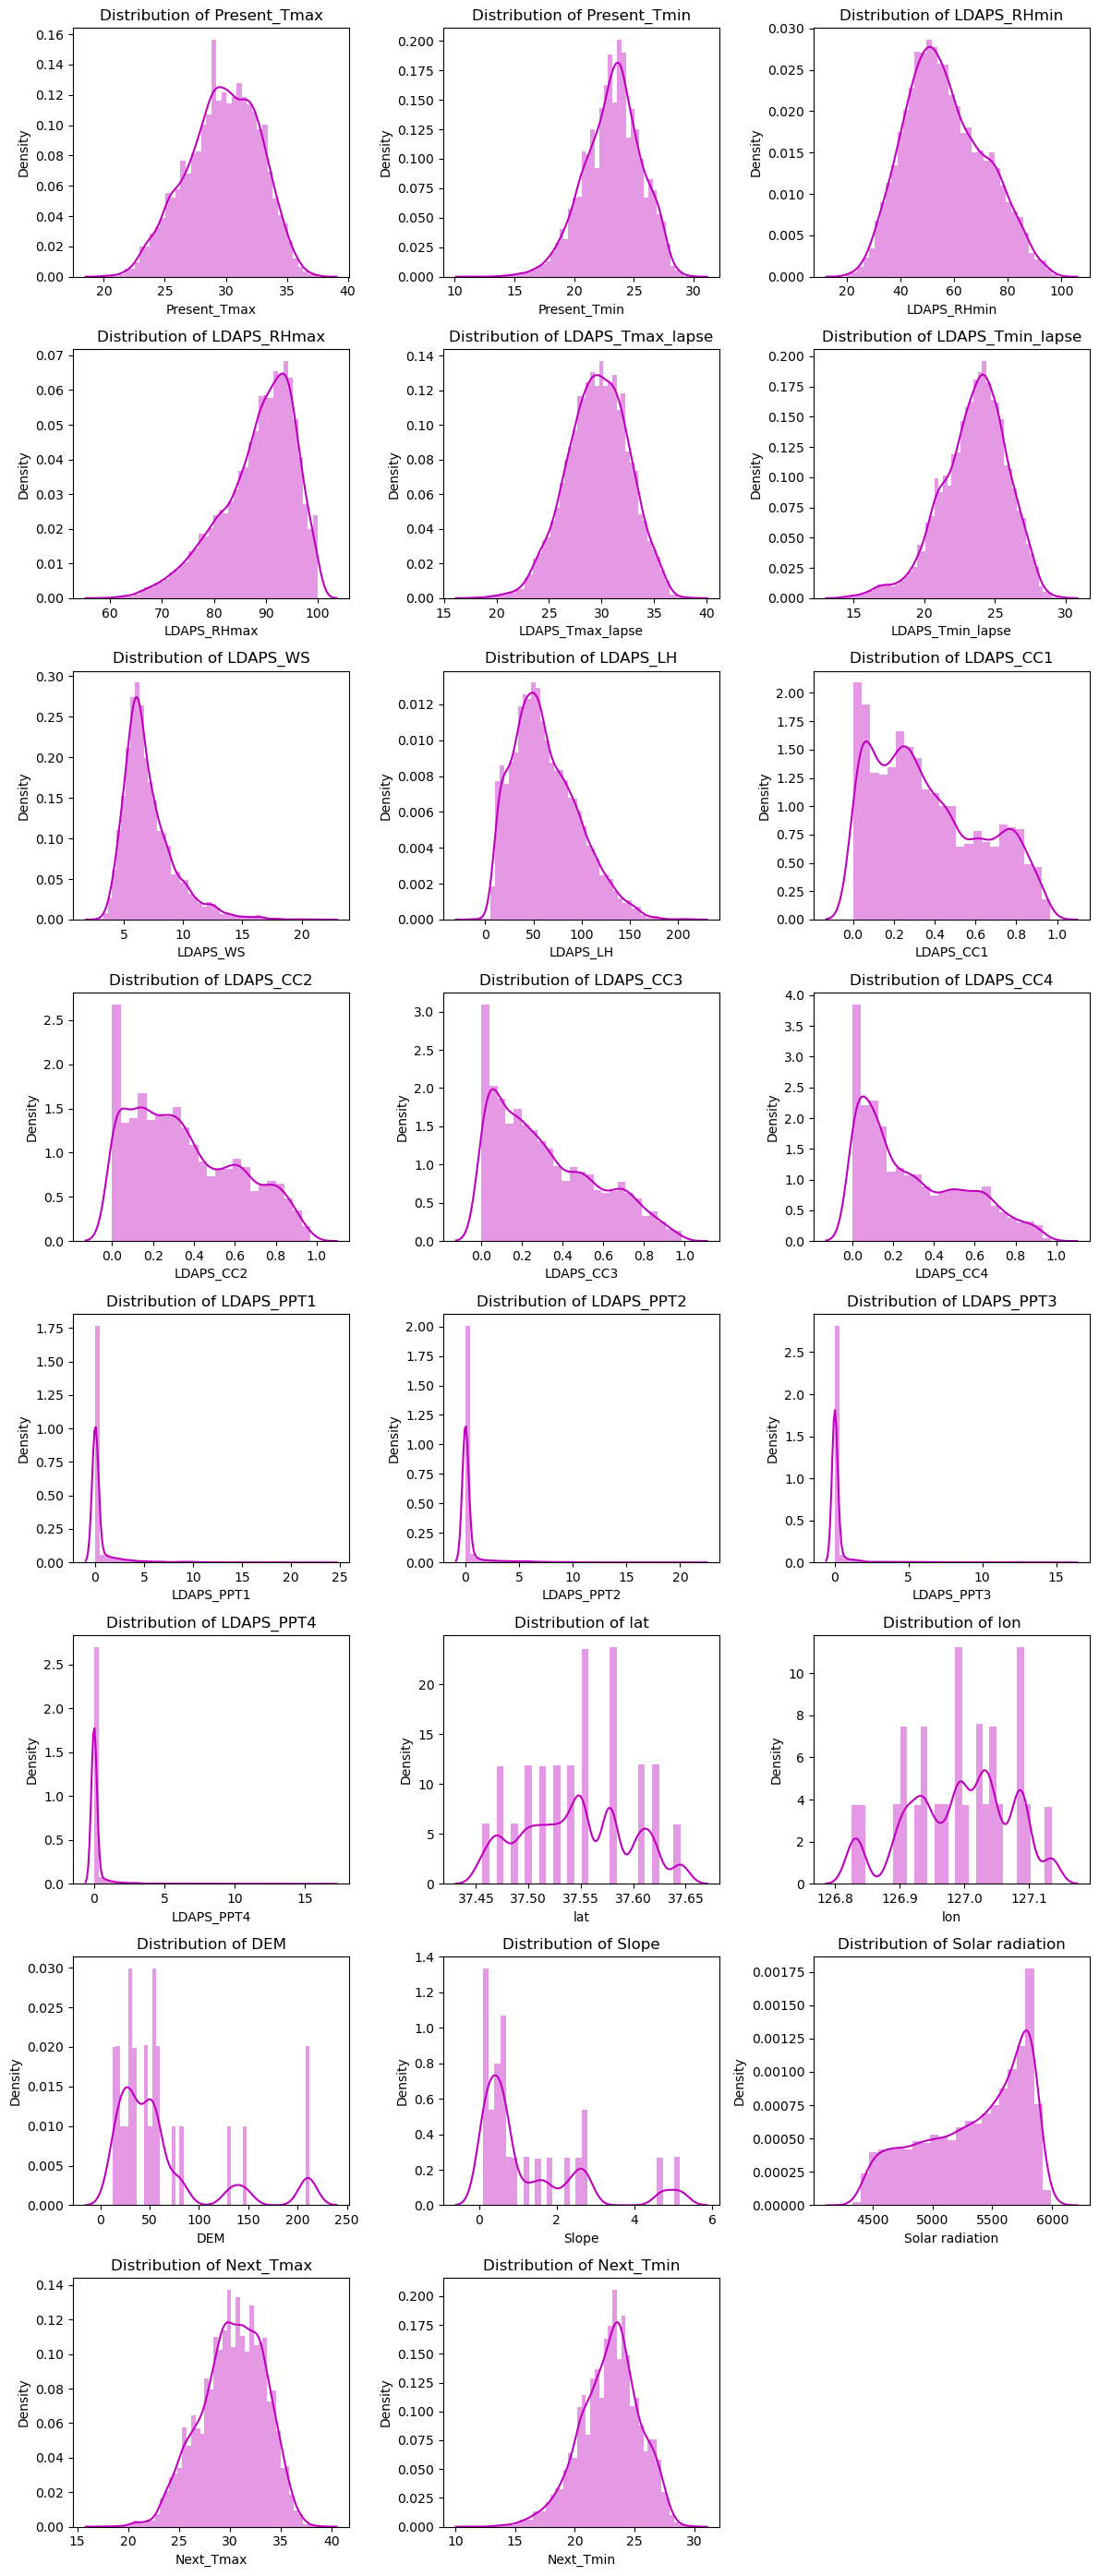

In [205]:
#Analyse the distribution of data for all the continuous data columns
plt.figure(figsize=(12,28),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(8,3,plotnumber)
    sns.distplot(df[col],color="m")
    plt.title(f"Distribution of {col}")
    plotnumber+=1
plt.tight_layout()

Observations:

All the variables are normally distributed.

The columns "LDAPS_WS", "LDAPS_LH", "LDAPS_CC2", "LDAPS_CC3", "LDAPS_CC4", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4", "DEM" and "Slope" are all right skewed.

The column "Solar radiation" is left skewed.

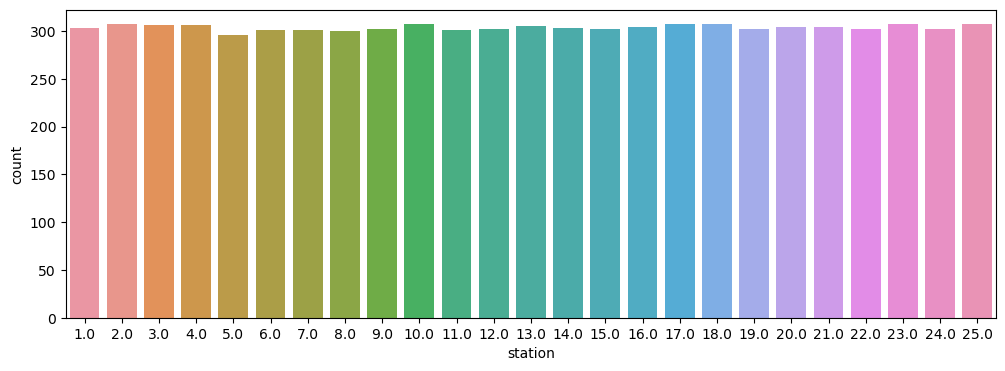

In [206]:
#Analyse the distribution of data for "station"
plt.figure(figsize=(12,4),facecolor="white")
sns.countplot(x='station',data=df)
plt.show()

We can observe that almost equal amount of data is available for all the stations.

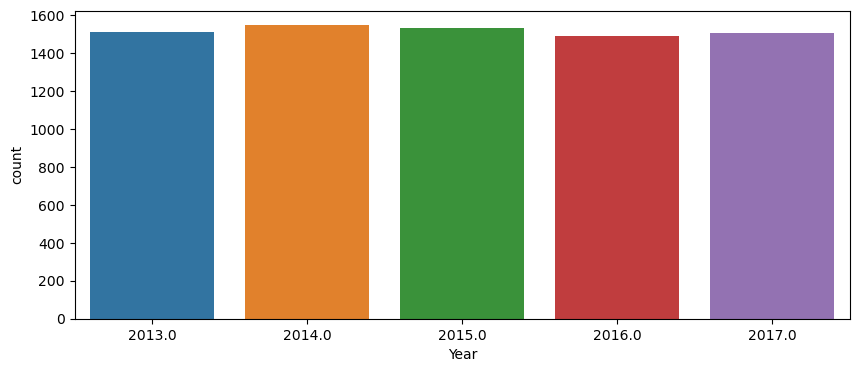

In [207]:
#Analyse the distribution of data for "Year"
plt.figure(figsize=(10,4),facecolor="white")
sns.countplot(x='Year',data=df)
plt.show()

We can observe that almost equal amount of data is available for all the years.

Bivariate Analysis

# Analyse the relationship between the label "Next_Tmax" and features

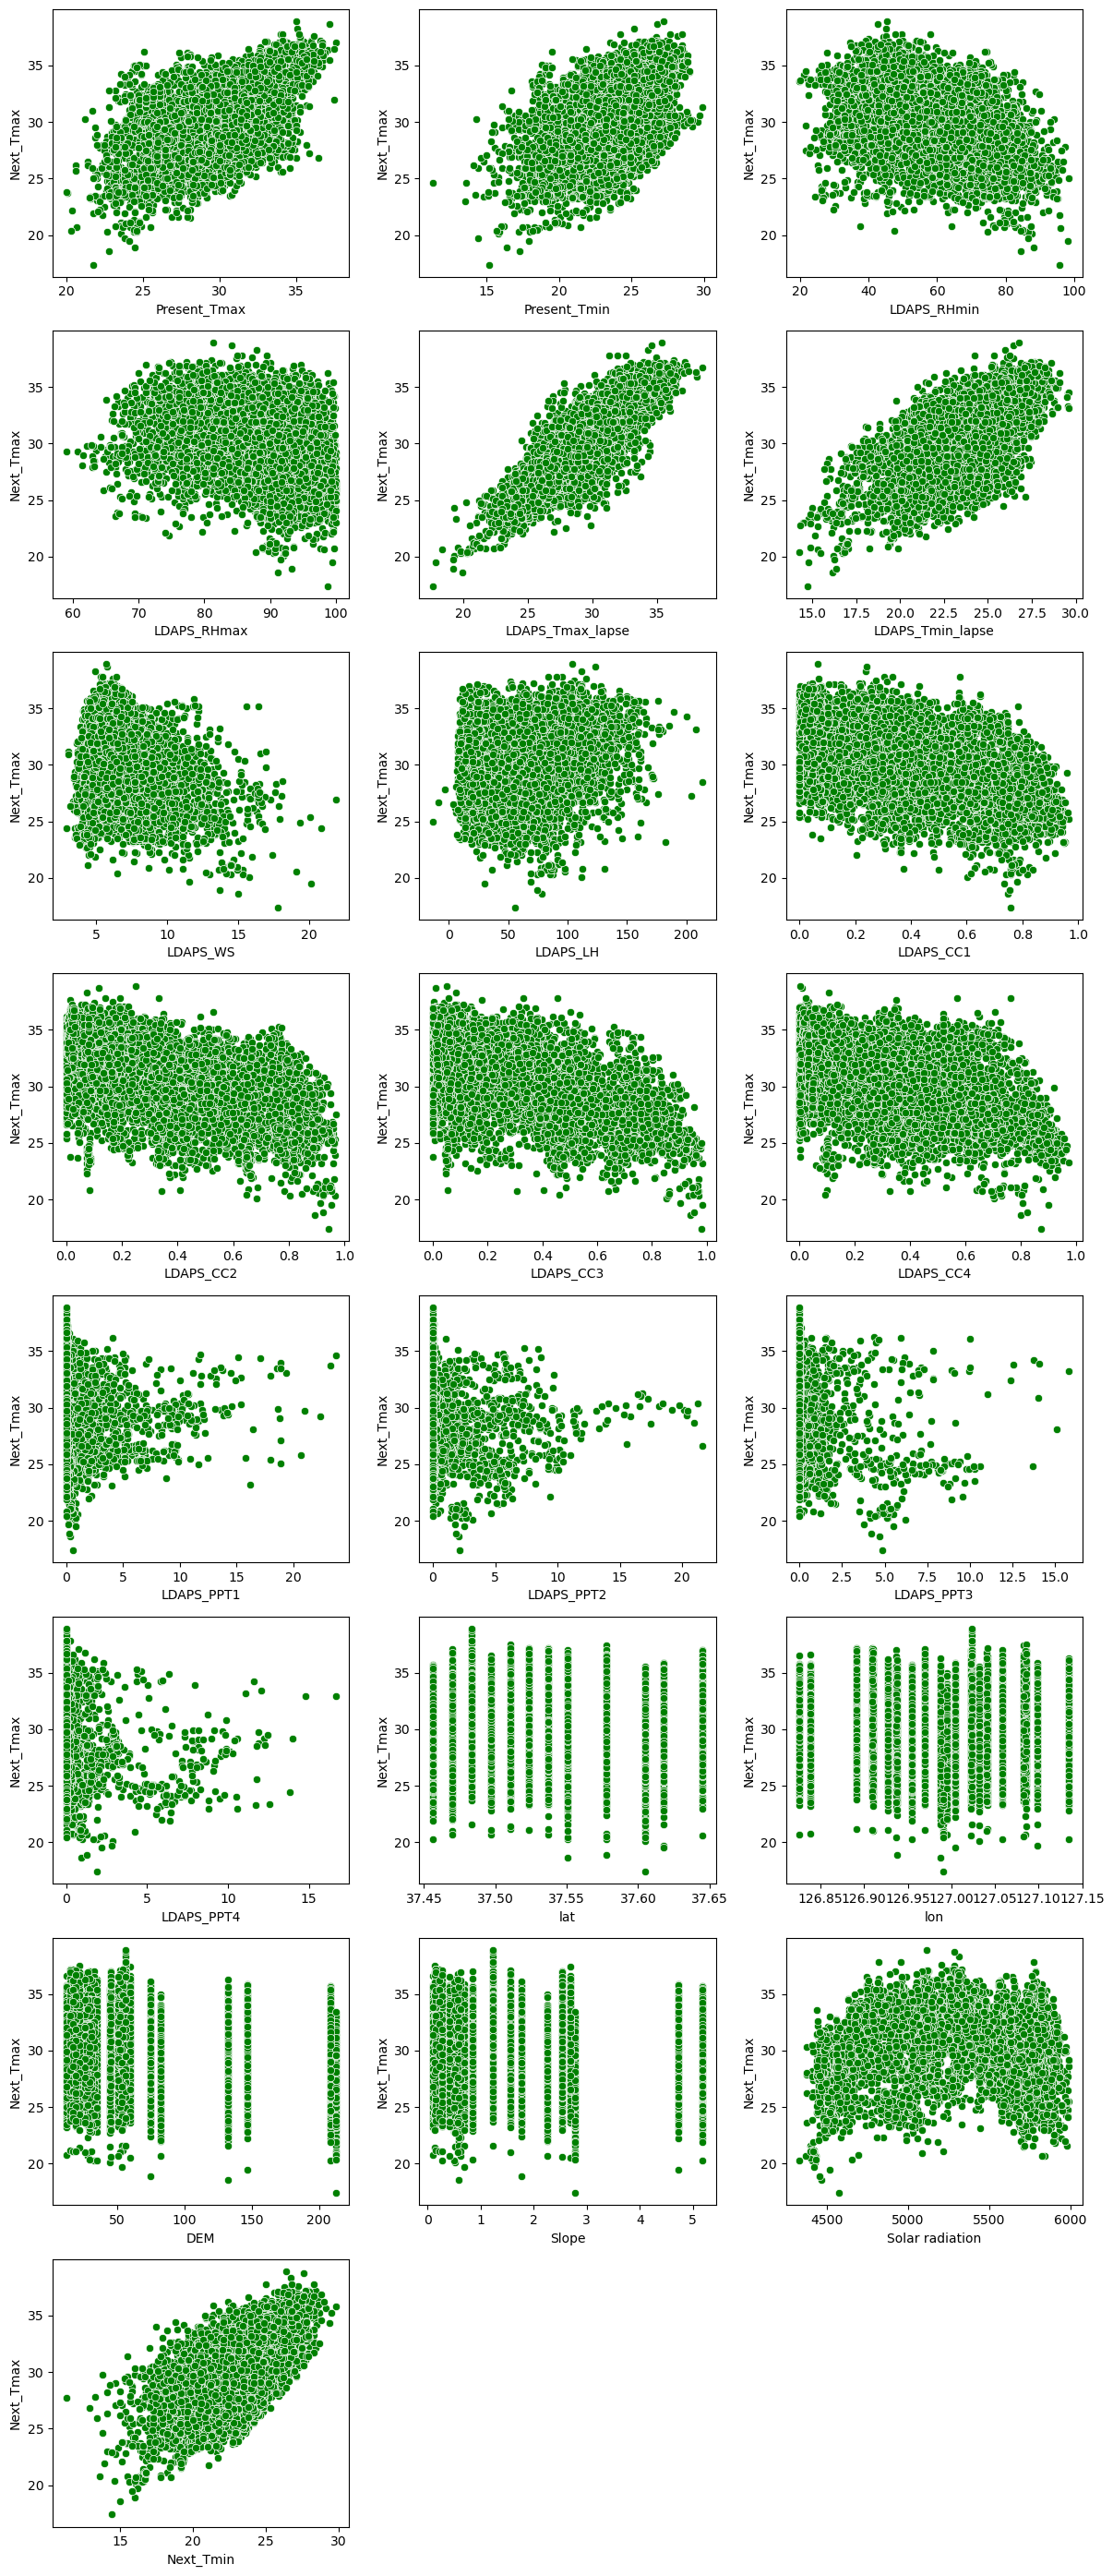

In [208]:
#Analyse the correlation between "Next_Tmax	" and various continuous features
continuous_features=continuous_col.copy()
continuous_features.remove("Next_Tmax")
plt.figure(figsize=(12,28),facecolor="white")
plotnumber=1
for col in continuous_features:
    ax=plt.subplot(8,3,plotnumber)
    sns.scatterplot(x=col,y='Next_Tmax',data=df,color='green')
    plotnumber+=1
plt.tight_layout()

Observations:

There is positive correlation between the label "Next_Tmax" and the features "Present_Tmax", "Present_Tmin", "LDAPS_Tmax_lapse", "LDAPS_Tmin_lapse", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT4" and "Next_Tmin".

There is negative correlation between the label "Next_Tmax" and the feature "LDAPS_RHmin".

There is not much correlation between the label "Next_Tmax" and the remaining features.

Regardless of the 6-hour quarter within a 24-hour day, the Next-day Maximum Temperature tends to decrease as the cloud cover exceeds 0.6.

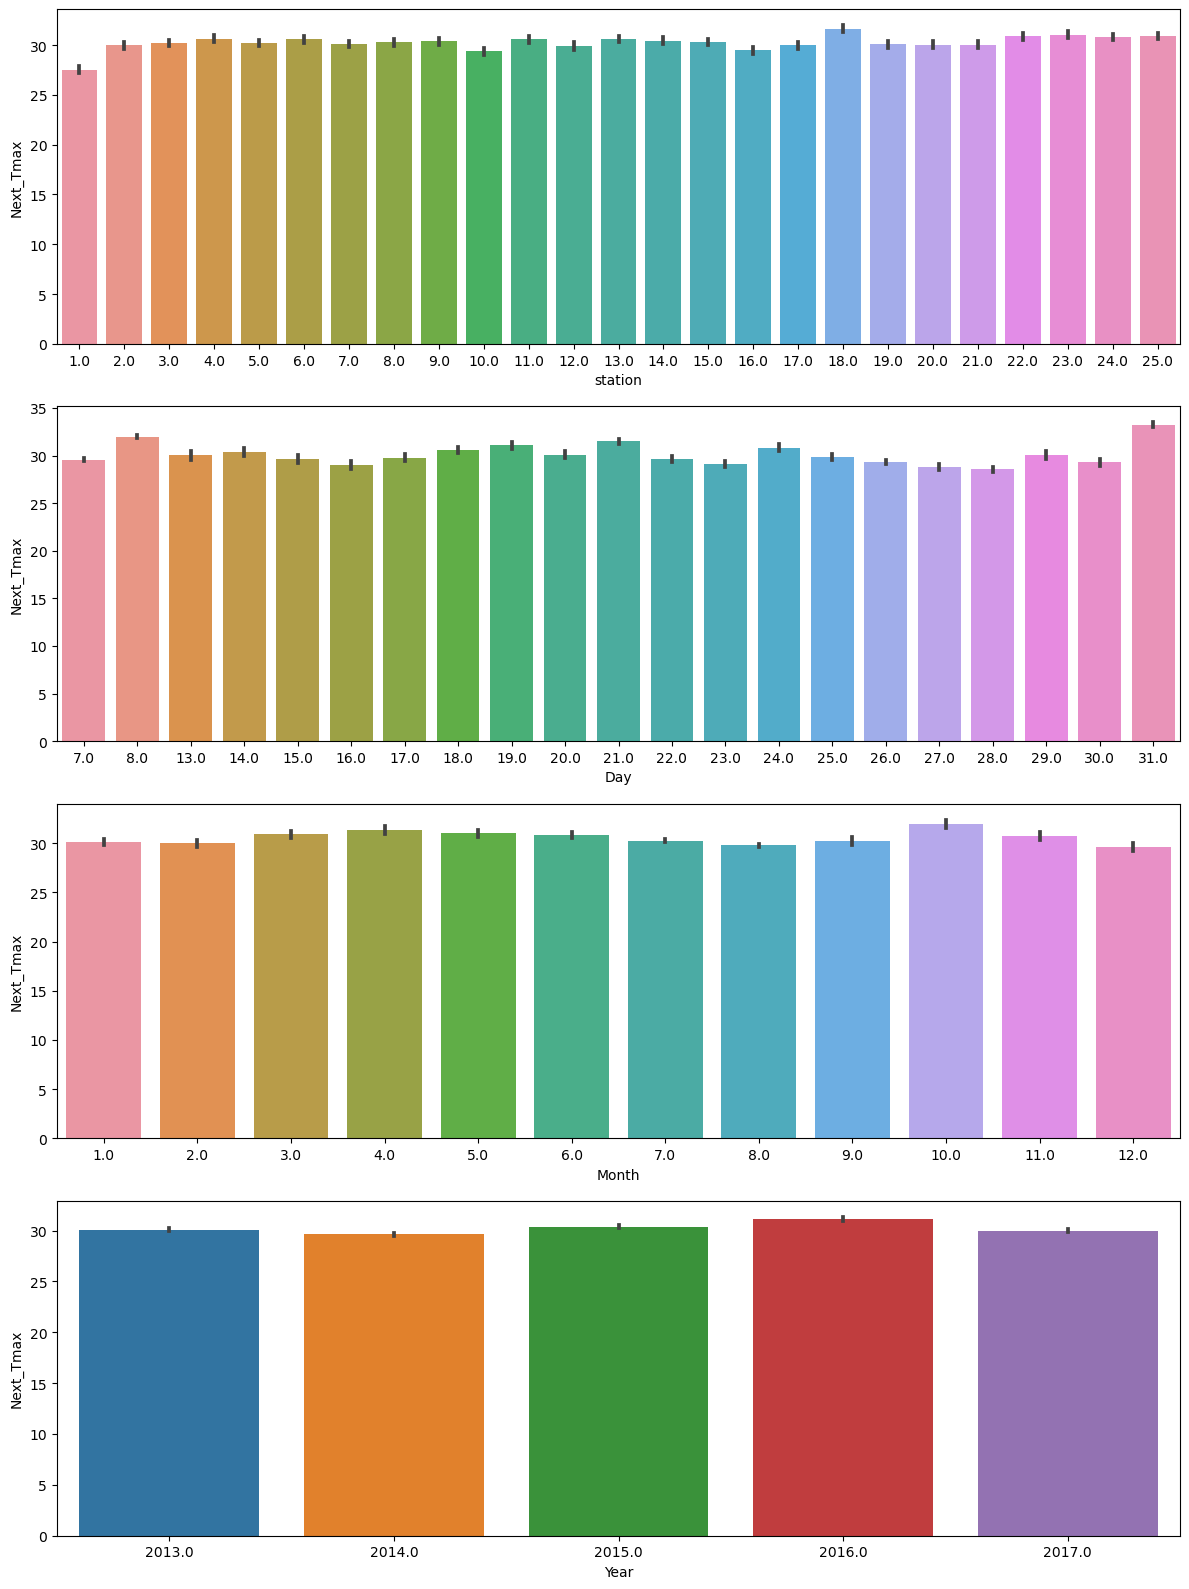

In [209]:
#Analyse the correlation between "Next_Tmax" and categorical features
plt.figure(figsize=(12,16),facecolor="white")
plotnumber=1
for col in categorical_col:
    ax=plt.subplot(4,1,plotnumber)
    sns.barplot(x=col,y="Next_Tmax",data=df)
    plotnumber+=1
plt.tight_layout()

Observations:

Station number 18 has recorded highest next-day maximum air temperatures and station number 1 has recorded lowest next-day maximum air temperatures in all the years.

The next-day maximum air temperature has been highest in month 10 which is October in all the years.

In the year 2016 highest next-day maximum air temperatures have been recorded.

# Analyse the relationship between the label "Next_Tmin" and features

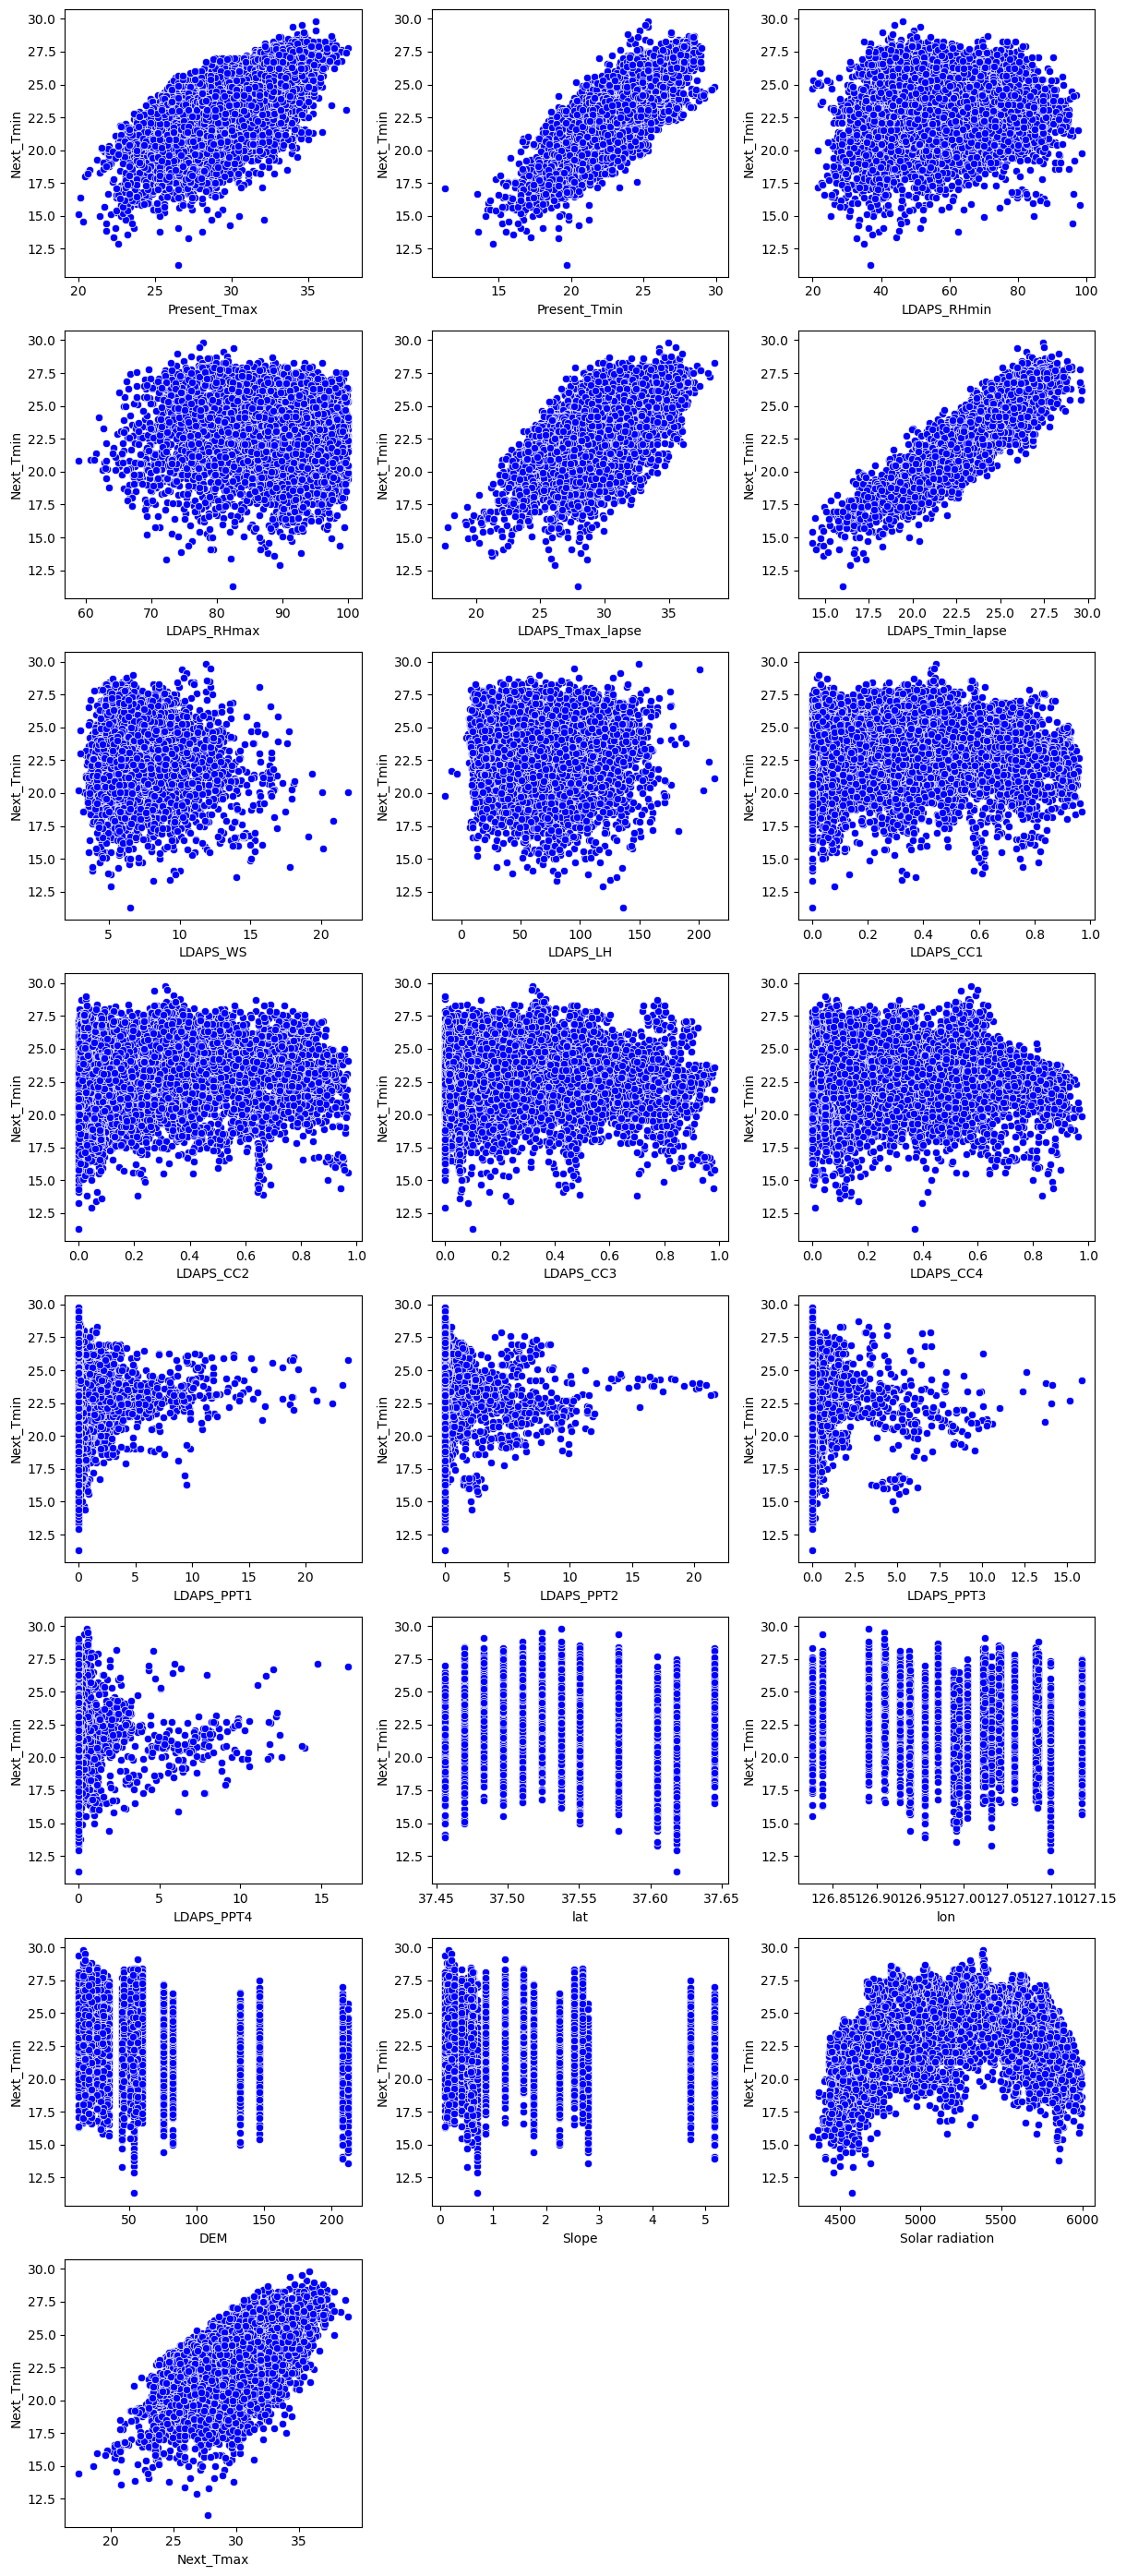

In [210]:
#Analyse the correlation between "Next_Tmin" and various continuous features
continuous_features=continuous_col.copy()
continuous_features.remove("Next_Tmin")
plt.figure(figsize=(12,28),facecolor="white")
plotnumber=1
for col in continuous_features:
    ax=plt.subplot(8,3,plotnumber)
    sns.scatterplot(x=col,y='Next_Tmin',data=df,color='blue')
    plotnumber+=1
plt.tight_layout()

Observations:

There is postive correlation between the label "Next_Tmin" and the features "Present_Tmax", "Present_Tmin", "LDAPS_Tmax_lapse", "LDAPS_Tmin_lapse", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4" and "Next_Tmax".

There is not much of correlation between the label "Next_Tmin" and the remaining features.

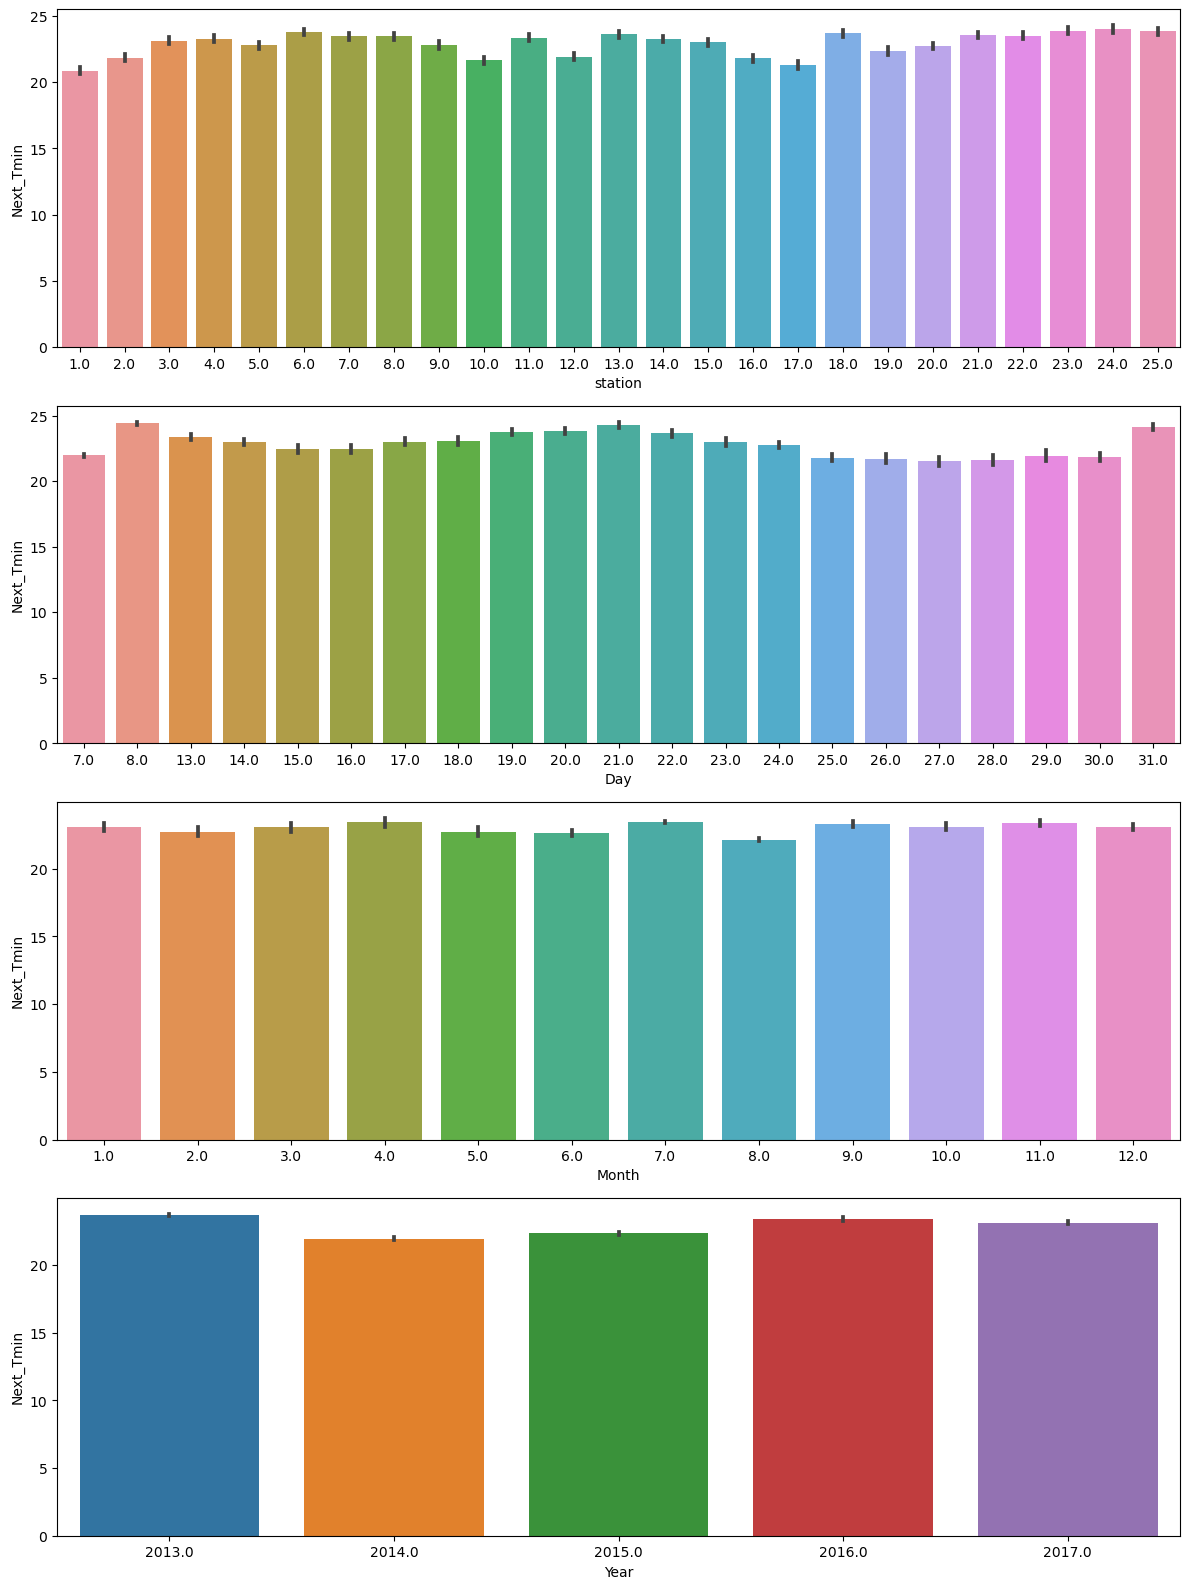

In [211]:
#Analyse the correlation between "Next_Tmin" and categorical features
plt.figure(figsize=(12,16),facecolor="white")
plotnumber=1
for col in categorical_col:
    ax=plt.subplot(4,1,plotnumber)
    sns.barplot(x=col,y="Next_Tmin",data=df)
    plotnumber+=1
plt.tight_layout()

Observations:

Station number 24 has recorded highest next-day minimum air temperatures and station number 1 has recorded lowest next-day minimum air temperatures in all the years.

The next-day minimum air temperature has been highest in month 7 which is July in all the years.

In the year 2013 highest next-day minimum air temperatures have been recorded.

# Analyse the relationship between different features

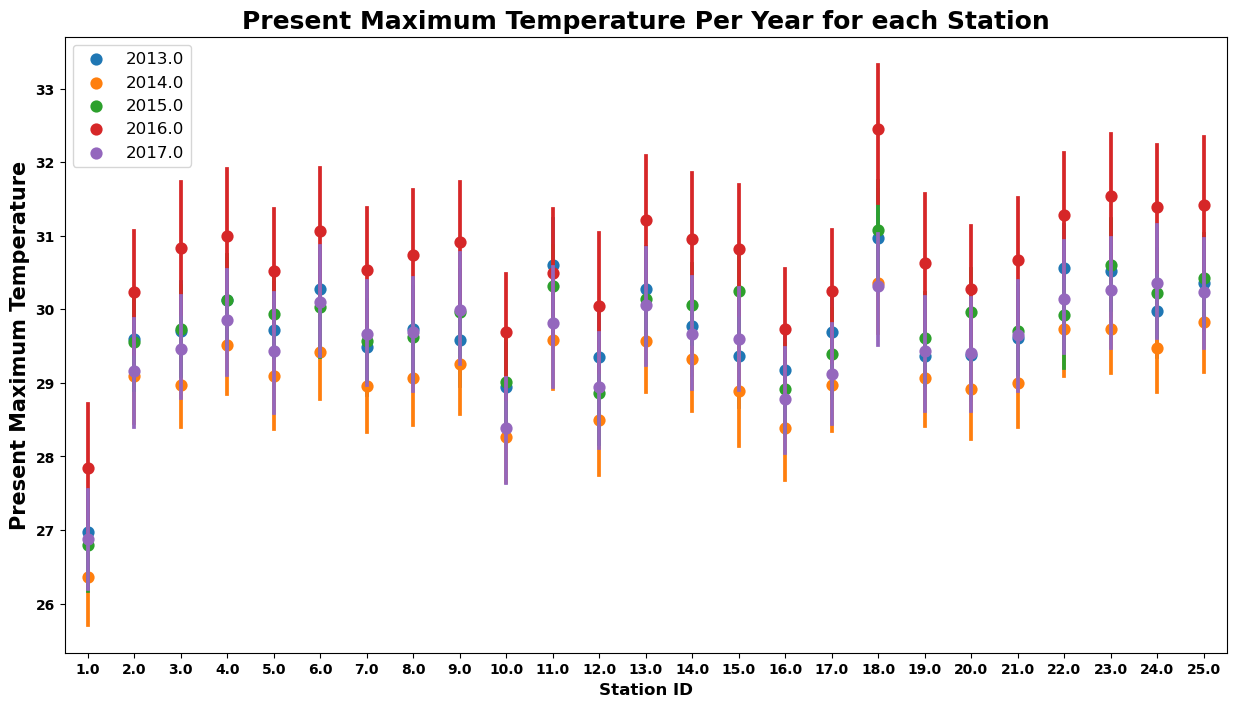

In [212]:
#Line Plot of Present Temperature Maximum over each Station
plt.figure(figsize=(15,8))
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=18, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':12,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=10,fontweight ='bold')
plt.yticks(fontsize=10,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

Observations:

Station 18 consistently recorded higher temperatures throughout the four-year period compared to other stations.

Station 1 stands out as the coolest station throughout the entire timeframe.

The data reveals that 2016 was the hottest year, while 2014 was the coolest. Further exploration of these two years individually could be intriguing.

In comparison to 2016, the year 2017 appears significantly cooler, providing relief to the residents.

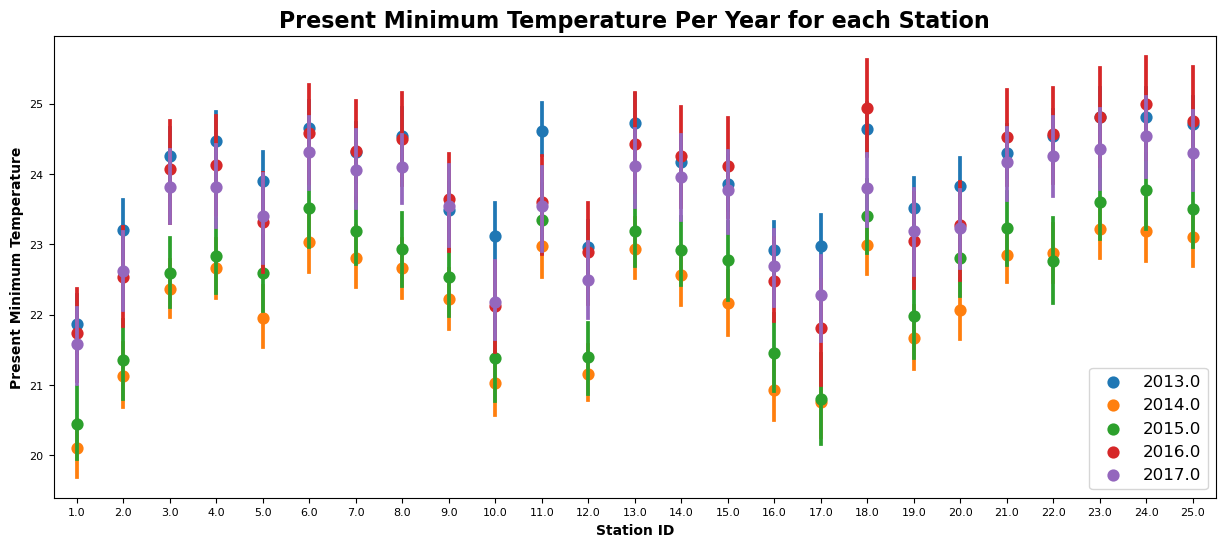

In [213]:
# Line Plot of Present Temperature Minimum over each Station
plt.figure(figsize=(15,6))
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=16, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':10,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':10,'fontweight' :'bold'})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=12)
plt.show()

Observations:

The data indicates that the year 2014 was the coolest among all the years in the timeframe.

Surprisingly, Station 24 recorded the highest Present Minimum Temperature, even though it did not have the highest Present Maximum Temperature. This suggests that Station 24 experiences the least temperature drop over the course of the day.

Station 1 emerges as the coolest station overall, closely followed by Station 17. These stations might be popular tourist spots during the summer due to their cooler temperatures.

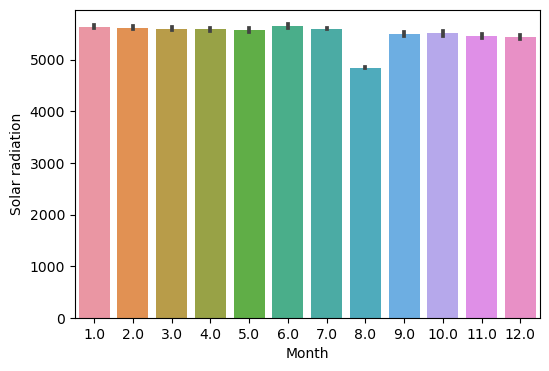

In [214]:
# Analyse the relationship between "Month" and "Solar radiation"
plt.figure(figsize=(6,4))
sns.barplot(x="Month", y="Solar radiation",data=df)
plt.show()

We can see that month 8 which is August has received the lowest solar radiation.

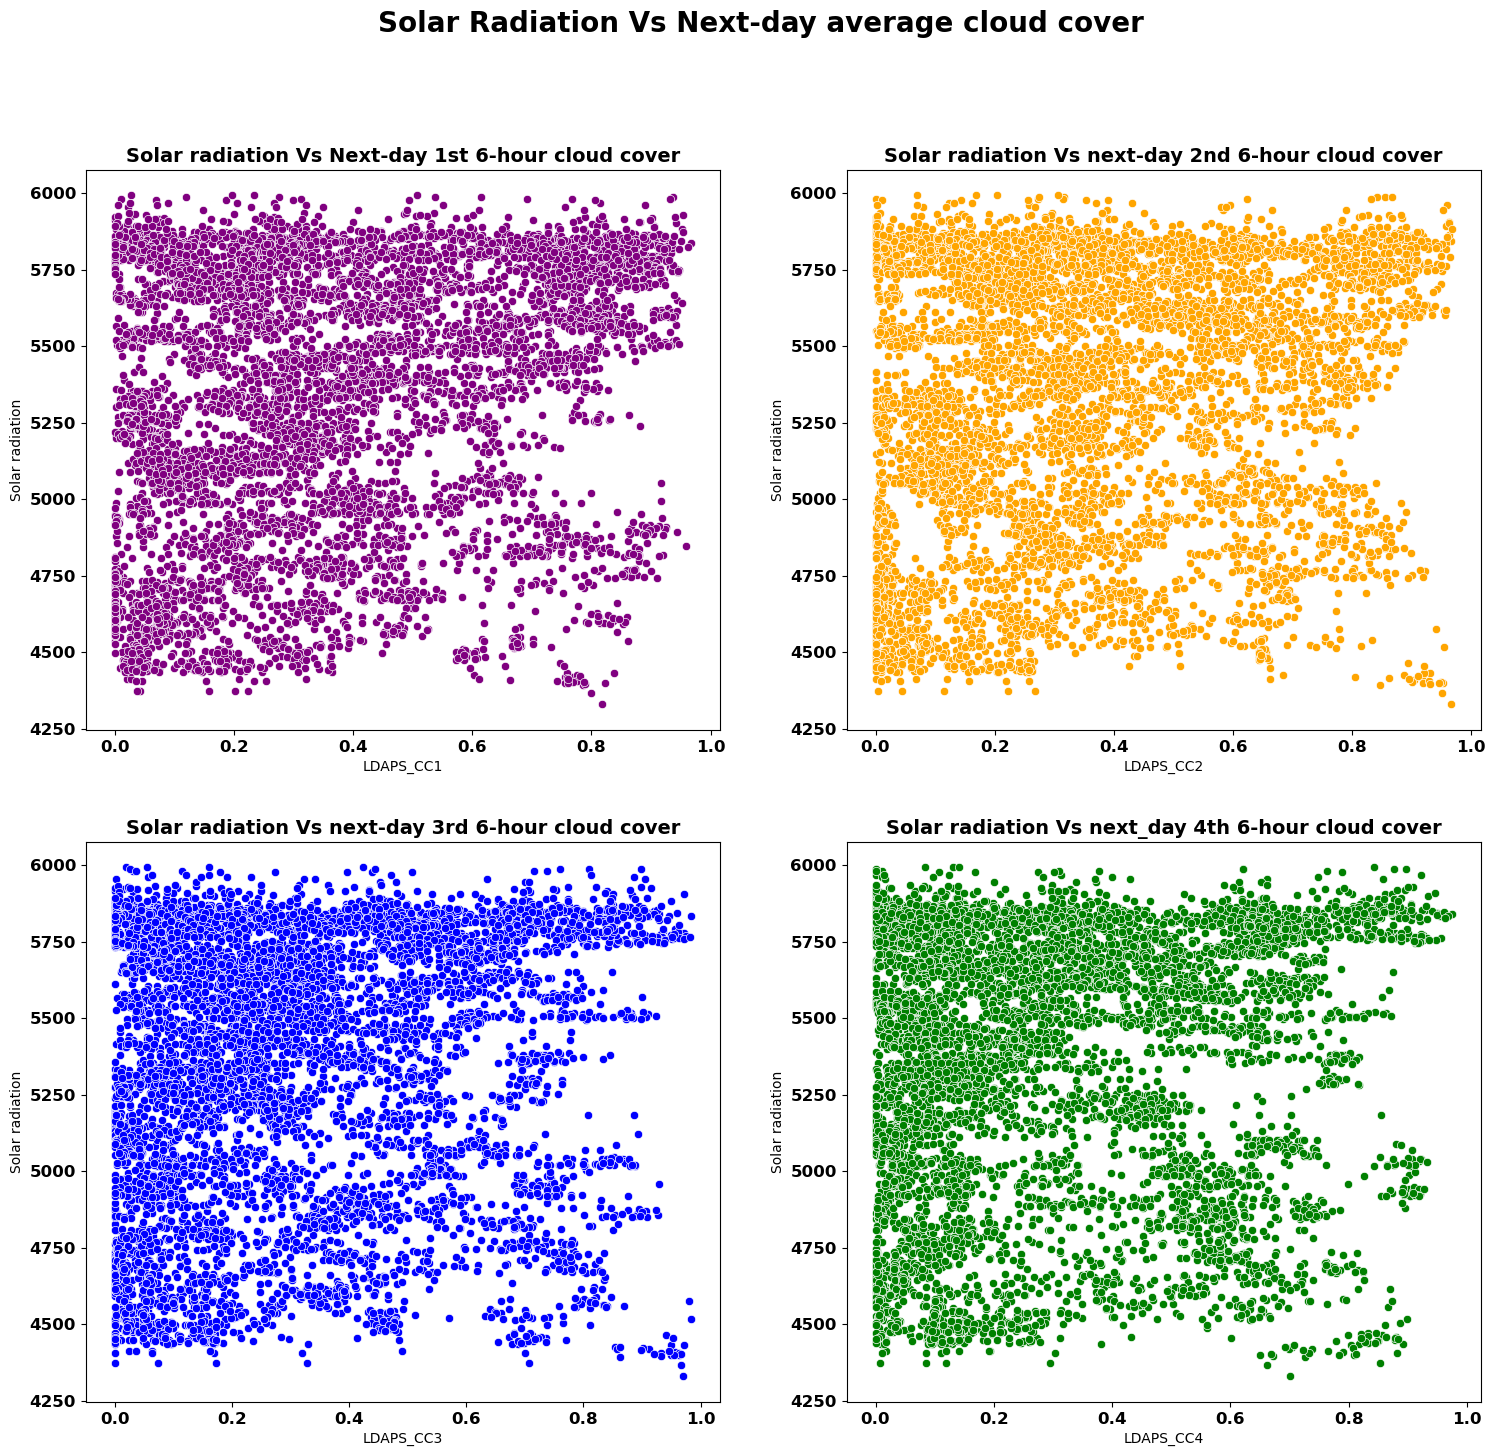

In [215]:
# Analyse the relationship between solar radiation and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

#First plot:
plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Second plot:
plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='orange')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Third plot:
plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Fourth plot:
plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.show()

We can clearly say that for cloud cover greater than 0.7 high value solar radiation contributed the most.

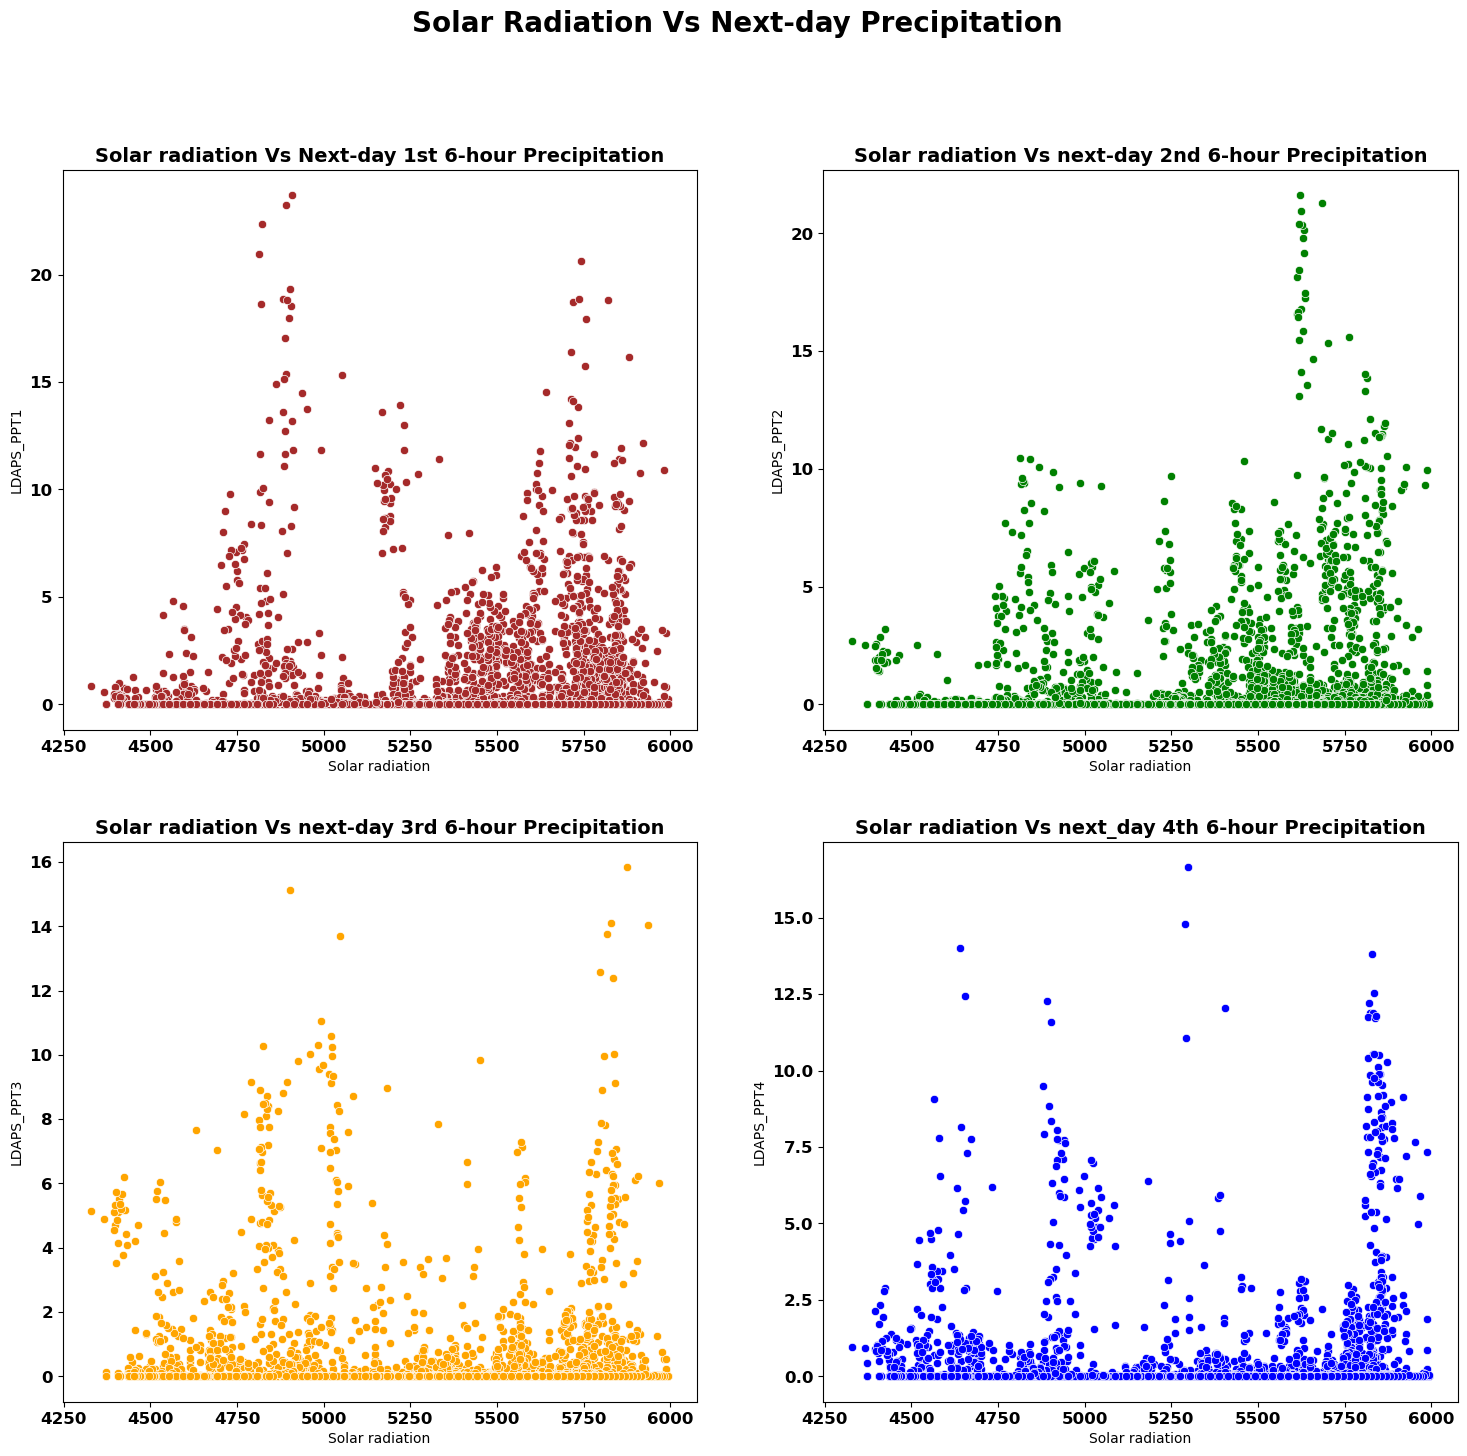

In [216]:
# Analyse the relationship between solar radiation and next day precipitation

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

# First Plot
plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="brown")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Second Plot
plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Third Plot
plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='orange')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Fourth Plot
plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.show()

We can observe that regardless of the specific 6-hour quarter within a 24-hour day, solar radiation values exceeding 5500 W/m² are associated with higher precipitation, typically exceeding 8 units.

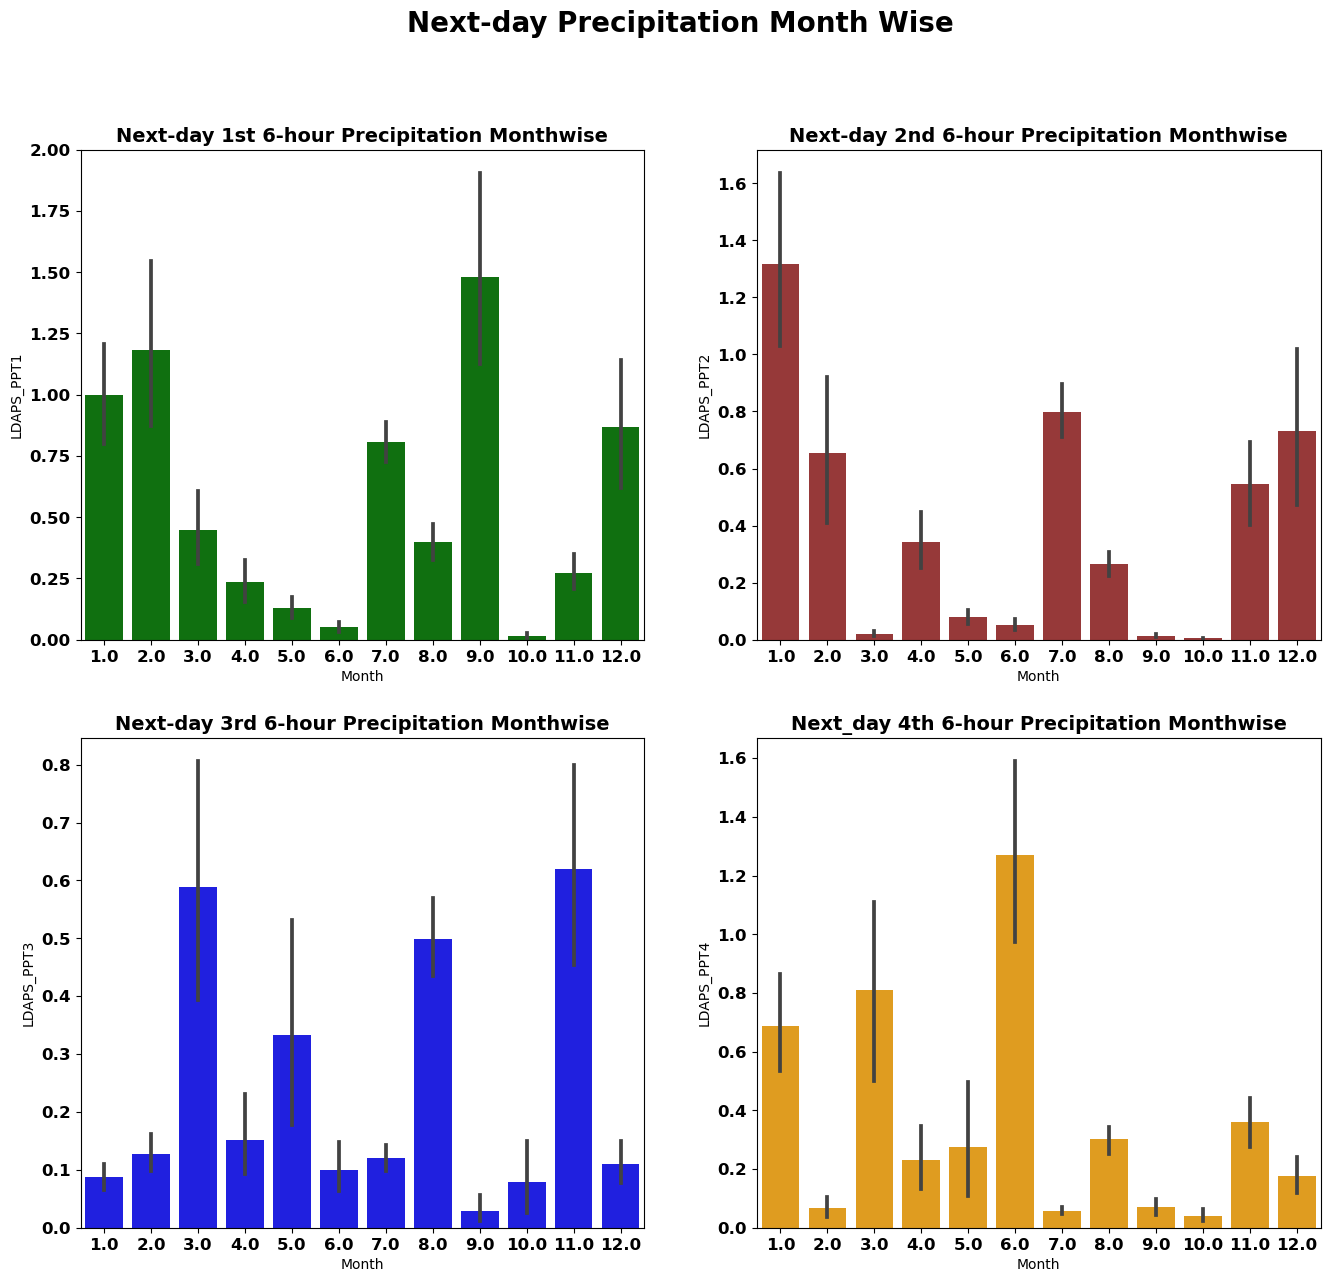

In [217]:
# Analyse next day precipitation monthwise

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Observations:

The highest precipitation is observed in the 1st quarter of the day during the 9th month.

In the 1st month, the highest precipitation is observed in the 2nd quarter of the day.

During the 11th month, the highest precipitation is observed in the 3rd quarter of the day.

In the 6th month, the highest precipitation is observed in the 4th quarter of the day.

We will make a copy df1 of the dataset df so that we can use the copied dataset df1 later for prediction of the label "Next_Tmin".

In [218]:
df1=df.copy()

# Prediction of the label "Next_Tmax"

Checking for Outliers

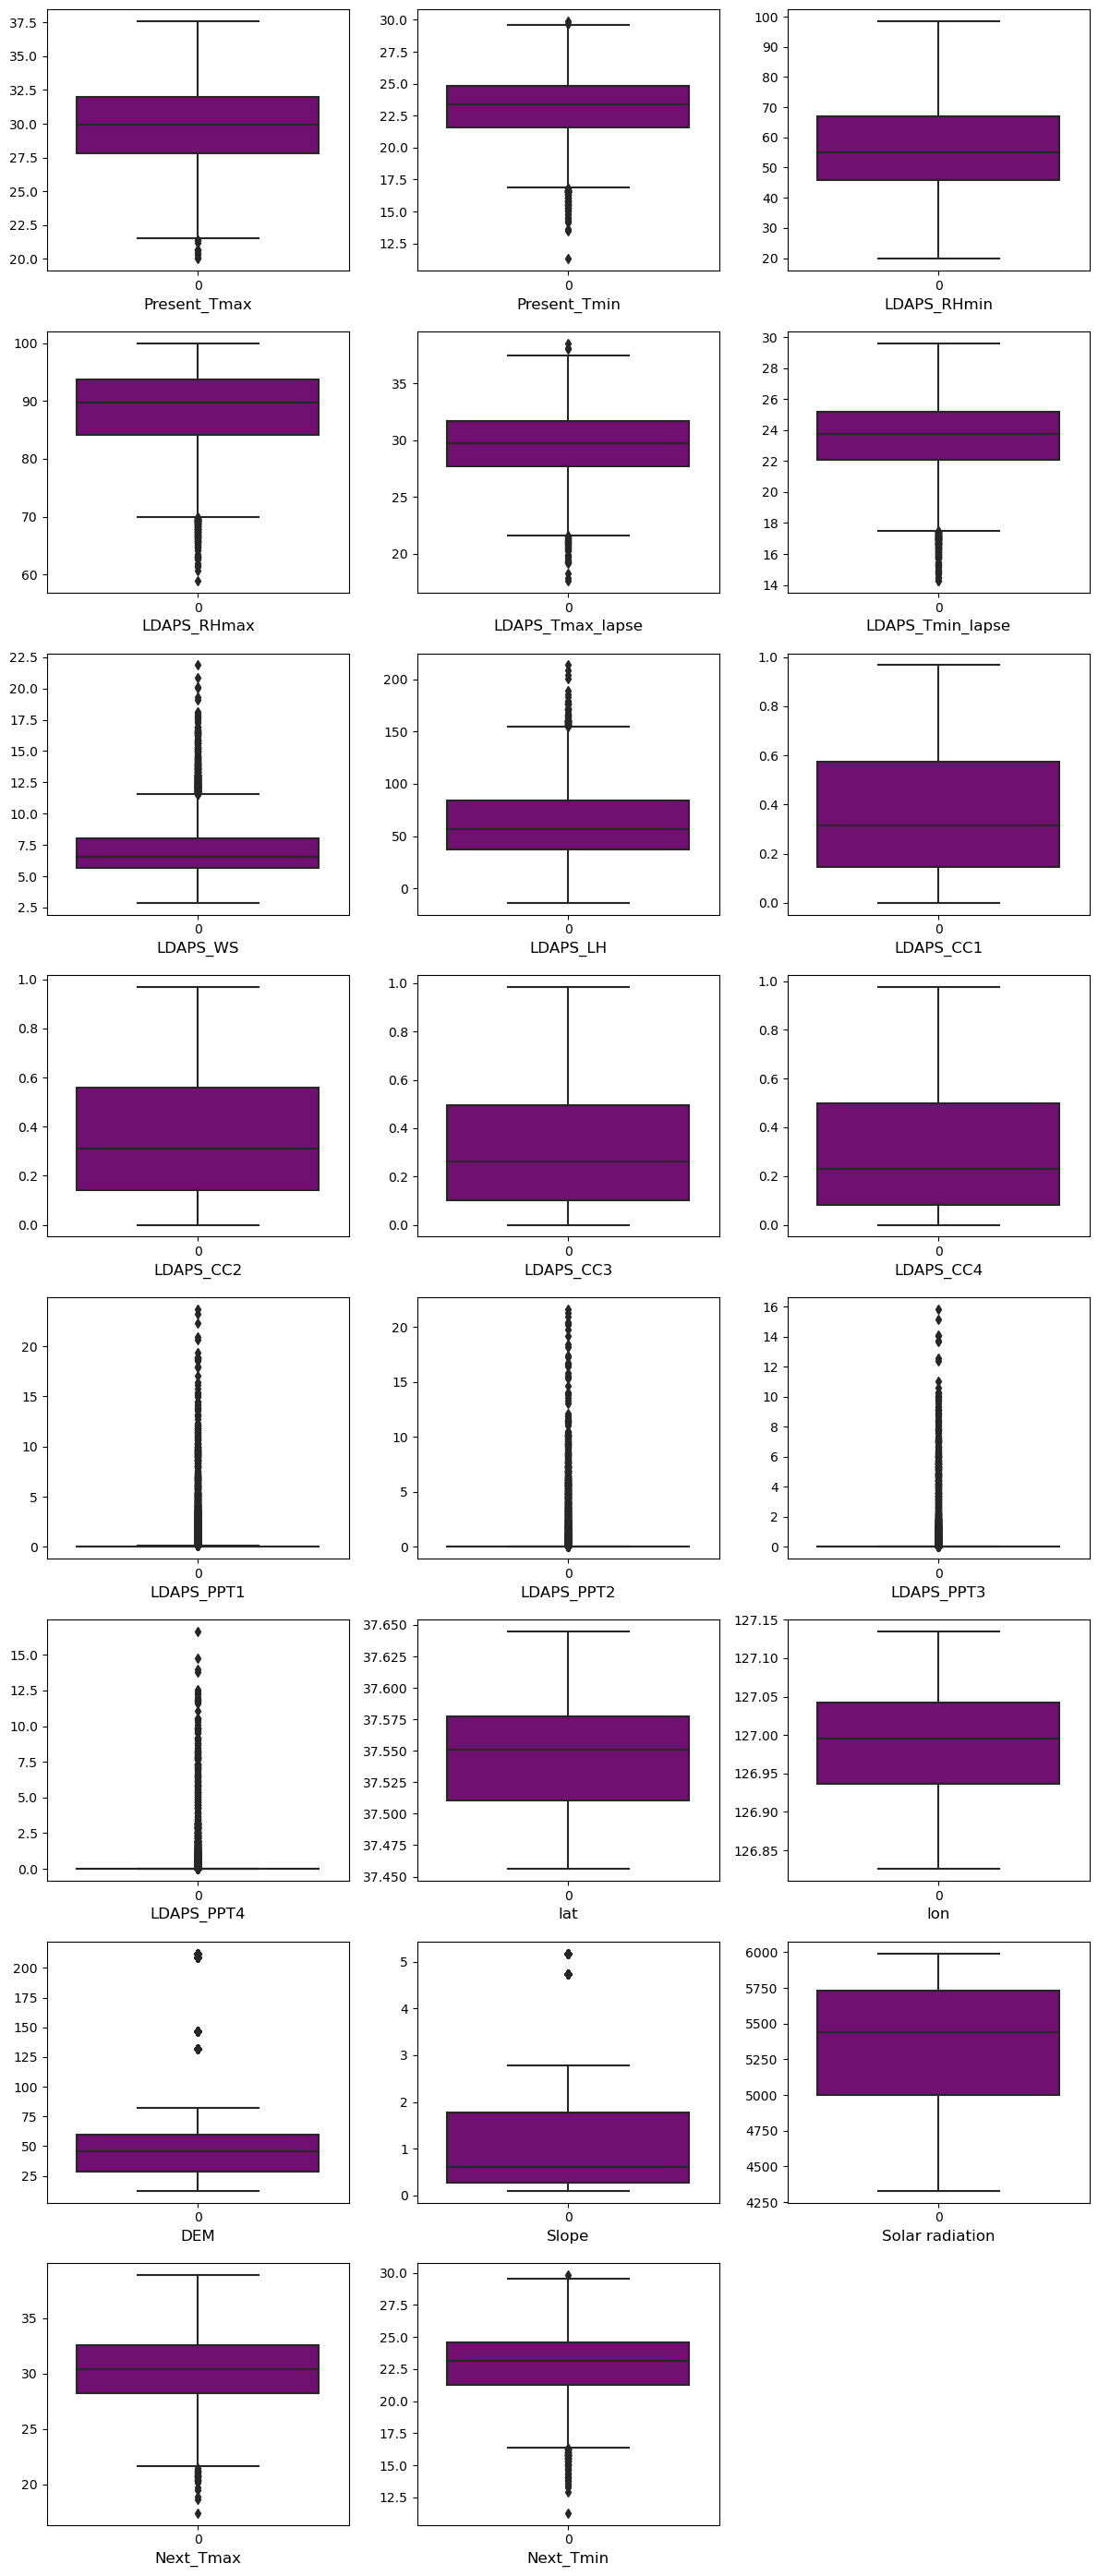

In [74]:
#Check for outliers in continuous data columns
plt.figure(figsize=(12,28),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(8,3,plotnumber)
    sns.boxplot(df[col],color="purple")
    plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see that there are outliers in the columns "Present_Tmax", "Present_Tmin", "LDAPS_RHmax", "LDAPS_Tmax_lapse", "LDAPS_Tmin_lapse", "LDAPS_WS", "LDAPS_LH", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4", "DEM", "Slope", "Next_Tmax" and "Next_Tmin". We can't remove outliers from the label "Next_Tmax". So, we will remove outliers from the other columns using Z-Score technique.

In [77]:
#Remove outliers
from scipy.stats import zscore
out_features=df[["Present_Tmax","Present_Tmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","DEM","Slope","Next_Tmin"]]
z=np.abs(zscore(out_features))
df2=df[(z<3).all(axis=1)]

In [78]:
df2.shape

(6740, 27)

In [79]:
print("Data loss percentage - ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data loss percentage -  11.17554032683184


The data loss percentage is 11.18% which is more than 10% but since our dataset is very large we can accept this amount of data loss. So, we will copy the changed dataset df2 into the original dataset df.

In [80]:
df=df2.copy()

Checking for Skewness

In [81]:
df.skew()

station            -0.001543
Present_Tmax       -0.269789
Present_Tmin       -0.223716
LDAPS_RHmin         0.309325
LDAPS_RHmax        -0.686302
LDAPS_Tmax_lapse   -0.111772
LDAPS_Tmin_lapse   -0.381626
LDAPS_WS            1.085261
LDAPS_LH            0.566643
LDAPS_CC1           0.594402
LDAPS_CC2           0.505657
LDAPS_CC3           0.701106
LDAPS_CC4           0.708292
LDAPS_PPT1          3.724899
LDAPS_PPT2          4.855364
LDAPS_PPT3          5.513417
LDAPS_PPT4          5.923879
lat                 0.106680
lon                -0.277569
DEM                 1.763785
Slope               1.589498
Solar radiation    -0.519779
Next_Tmax          -0.270868
Next_Tmin          -0.237274
Day                 0.256200
Month              -0.680922
Year                0.024798
dtype: float64

We can see positive and negative skewness in many of the columns. We can't remove skewness from the label "Next_Tmax" and categorical columns. So, we will make a list of columns from which skewness has to be removed and apply different transformation methods to remove or reduce skewness from these columns.

In [135]:
#Copy df into a new dataset for checking different transformation methods
skew_df=df.copy()

In [136]:
#List of columns for removing skewness
skew_col=["LDAPS_RHmax","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","DEM","Slope","Solar radiation"]

Apply Yeo-Johnson transformation method to remove skewness

In [137]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
skew_df[skew_col]=pt.fit_transform(skew_df[skew_col])

In [138]:
skew_df.skew()

station            -0.001543
Present_Tmax       -0.269789
Present_Tmin       -0.223716
LDAPS_RHmin         0.309325
LDAPS_RHmax        -0.103331
LDAPS_Tmax_lapse   -0.111772
LDAPS_Tmin_lapse   -0.381626
LDAPS_WS            0.007668
LDAPS_LH           -0.030819
LDAPS_CC1           0.065267
LDAPS_CC2           0.049972
LDAPS_CC3           0.094378
LDAPS_CC4           0.142004
LDAPS_PPT1          1.616885
LDAPS_PPT2          1.820422
LDAPS_PPT3          1.994409
LDAPS_PPT4          2.266397
lat                 0.106680
lon                -0.277569
DEM                 0.038877
Slope               0.233729
Solar radiation    -0.172107
Next_Tmax          -0.270868
Next_Tmin          -0.237274
Day                 0.256200
Month              -0.680922
Year                0.024798
dtype: float64

So, we have removed skewness from all the columns as much as we can.

In [140]:
#Copy the changed dataset skew_df into the original dataset df
df=skew_df.copy()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6740 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           6740 non-null   float64
 1   Present_Tmax      6740 non-null   float64
 2   Present_Tmin      6740 non-null   float64
 3   LDAPS_RHmin       6740 non-null   float64
 4   LDAPS_RHmax       6740 non-null   float64
 5   LDAPS_Tmax_lapse  6740 non-null   float64
 6   LDAPS_Tmin_lapse  6740 non-null   float64
 7   LDAPS_WS          6740 non-null   float64
 8   LDAPS_LH          6740 non-null   float64
 9   LDAPS_CC1         6740 non-null   float64
 10  LDAPS_CC2         6740 non-null   float64
 11  LDAPS_CC3         6740 non-null   float64
 12  LDAPS_CC4         6740 non-null   float64
 13  LDAPS_PPT1        6740 non-null   float64
 14  LDAPS_PPT2        6740 non-null   float64
 15  LDAPS_PPT3        6740 non-null   float64
 16  LDAPS_PPT4        6740 non-null   float64


In [143]:
#Statistical summary of numerical columns
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin   LDAPS_RHmax  \
count  6740.000000   6740.000000   6740.000000  6740.000000  6.740000e+03   
mean     13.052967     29.920000     23.278309    55.542669  8.433742e-18   
std       7.208181      2.868242      2.309103    13.854806  1.000074e+00   
min       1.000000     21.200000     16.100000    19.794666 -2.236519e+00   
25%       7.000000     28.000000     21.700000    45.590419 -7.420179e-01   
50%      13.000000     30.100000     23.400000    54.111357  4.299058e-02   
75%      19.000000     32.100000     24.900000    65.092342  7.689891e-01   
max      25.000000     37.600000     29.900000    96.169815  2.170083e+00   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse      LDAPS_WS      LDAPS_LH  \
count       6740.000000       6740.000000  6.740000e+03  6.740000e+03   
mean          29.895562         23.652038  2.530123e-16 -3.795184e-17   
std            2.752307          2.230232  1.000074e+00  1.000074e+00   
min           21.195428         16.558304 -4.023317e+00 -7.258814e+00   
25%           28.004136         22.199209 -6.346152e-01 -7.037155e-01   
50%           29.935081         23.863875 -5.236576e-02 -1.924604e-02   
75%           31.845010         25.212126  6.638715e-01  7.440076e-01   
max           38.140534         29.619342  2.437306e+00  2.403745e+00   

          LDAPS_CC1  ...          lat          lon           DEM  \
count  6.740000e+03  ...  6740.000000  6740.000000  6.740000e+03   
mean   1.012049e-16  ...    37.544017   126.990768  7.063259e-17   
std    1.000074e+00  ...     0.050033     0.079487  1.000074e+00   
min   -1.709723e+00  ...    37.456200   126.826000 -1.987408e+00   
25%   -8.269520e-01  ...    37.510200   126.937000 -5.778671e-01   
50%   -2.533559e-02  ...    37.550700   126.995000  9.848420e-02   
75%    7.629619e-01  ...    37.577600   127.042000  4.567269e-01   
max    1.918466e+00  ...    37.645000   127.135000  1.853755e+00   

              Slope  Solar radiation    Next_Tmax    Next_Tmin          Day  \
count  6.740000e+03     6.740000e+03  6740.000000  6740.000000  6740.000000   
mean   9.382538e-17     2.192773e-16    30.531113    23.062671    16.264985   
std    1.000074e+00     1.000074e+00     2.926277     2.359280     8.206678   
min   -1.477190e+00    -1.864540e+00    20.800000    15.500000     7.000000   
25%   -9.299975e-01    -8.738419e-01    28.600000    21.500000     8.000000   
50%   -1.908819e-01     7.632750e-02    30.700000    23.200000    16.000000   
75%    9.167507e-01     9.208676e-01    32.700000    24.700000    24.000000   
max    1.753125e+00     1.891505e+00    38.900000    29.800000    31.000000   

             Month         Year  
count  6740.000000  6740.000000  
mean      7.078042  2014.985163  
std       2.247914     1.396502  
min       1.000000  2013.000000  
25%       7.000000  2014.000000  
50%       7.000000  2015.000000  
75%       8.000000  2016.000000  
max      12.000000  2017.000000  

[8 rows x 27 columns]

Observations:

Now, we can see that there is not much skewness in the continuous features as the mean is almost equal to the median (50%) in these columns.

Also, outliers from all the continuous features have been removed due to which max is not mucn bigger than 75% in the continuous features.

In [144]:
#Check the correlation between features and label
cor=df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110678      0.134278    -0.069718   
Present_Tmax      0.110678      1.000000      0.610660    -0.154387   
Present_Tmin      0.134278      0.610660      1.000000     0.150995   
LDAPS_RHmin      -0.069718     -0.154387      0.150995     1.000000   
LDAPS_RHmax      -0.182425     -0.320116     -0.053587     0.566087   
LDAPS_Tmax_lapse  0.067453      0.540959      0.442221    -0.555530   
LDAPS_Tmin_lapse  0.105080      0.617110      0.764593     0.129097   
LDAPS_WS          0.029755     -0.072043      0.033485     0.171800   
LDAPS_LH         -0.136016      0.118617     -0.009184    -0.002289   
LDAPS_CC1         0.011579     -0.287098      0.103783     0.580375   
LDAPS_CC2         0.007351     -0.163813      0.122341     0.703541   
LDAPS_CC3         0.006136     -0.061574      0.043293     0.636226   
LDAPS_CC4         0.011156     -0.050325     -0.000450     0.459579   
LDAPS_PPT1       -0.002086     -0.190480      0.067877     0.411037   
LDAPS_PPT2       -0.006675     -0.097277      0.090269     0.510175   
LDAPS_PPT3       -0.005546     -0.023023      0.034621     0.405598   
LDAPS_PPT4       -0.000995     -0.022070     -0.064718     0.244235   
lat              -0.242035     -0.052338     -0.073200     0.090153   
lon              -0.122804      0.011129     -0.043172    -0.093966   
DEM              -0.326330     -0.131309     -0.239531     0.057612   
Slope            -0.146309     -0.092723     -0.158309     0.084030   
Solar radiation  -0.034416     -0.099260     -0.046408     0.228914   
Next_Tmax         0.107094      0.587192      0.439660    -0.433807   
Next_Tmin         0.129780      0.616173      0.786257     0.134119   
Day               0.004852     -0.137206     -0.077409    -0.070064   
Month             0.003555      0.022188     -0.021835    -0.074875   
Year              0.006476      0.098970      0.098819     0.001775   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182425          0.067453          0.105080  0.029755   
Present_Tmax        -0.320116          0.540959          0.617110 -0.072043   
Present_Tmin        -0.053587          0.442221          0.764593  0.033485   
LDAPS_RHmin          0.566087         -0.555530          0.129097  0.171800   
LDAPS_RHmax          1.000000         -0.403603         -0.163308  0.061072   
LDAPS_Tmax_lapse    -0.403603          1.000000          0.621735 -0.154989   
LDAPS_Tmin_lapse    -0.163308          0.621735          1.000000 -0.012184   
LDAPS_WS             0.061072         -0.154989         -0.012184  1.000000   
LDAPS_LH             0.285981          0.005346         -0.142079 -0.055954   
LDAPS_CC1            0.415472         -0.404599          0.074176  0.189631   
LDAPS_CC2            0.364413         -0.482892          0.115856  0.148094   
LDAPS_CC3            0.143421         -0.468341          0.043065  0.065935   
LDAPS_CC4            0.046644         -0.367859         -0.010503  0.091309   
LDAPS_PPT1           0.420235         -0.307854         -0.043744  0.197396   
LDAPS_PPT2           0.368119         -0.344452          0.033812  0.165975   
LDAPS_PPT3           0.219422         -0.286080         -0.020064  0.090022   
LDAPS_PPT4           0.118279         -0.208230         -0.087768  0.168599   
lat                  0.232319         -0.038723         -0.091073 -0.027119   
lon                  0.013058          0.106301         -0.024161 -0.077665   
DEM                  0.174253         -0.110908         -0.170574  0.113610   
Slope                0.209298         -0.105547         -0.156812  0.095721   
Solar radiation      0.153922         -0.034100          0.032552  0.164152   
Next_Tmax           -0.323398          0.817058          0.547178 -0.206670   
Next_Tmin           -0.110530          0.553755          0.875568  0.022422   
Day                 -0.008969         -0.140925        

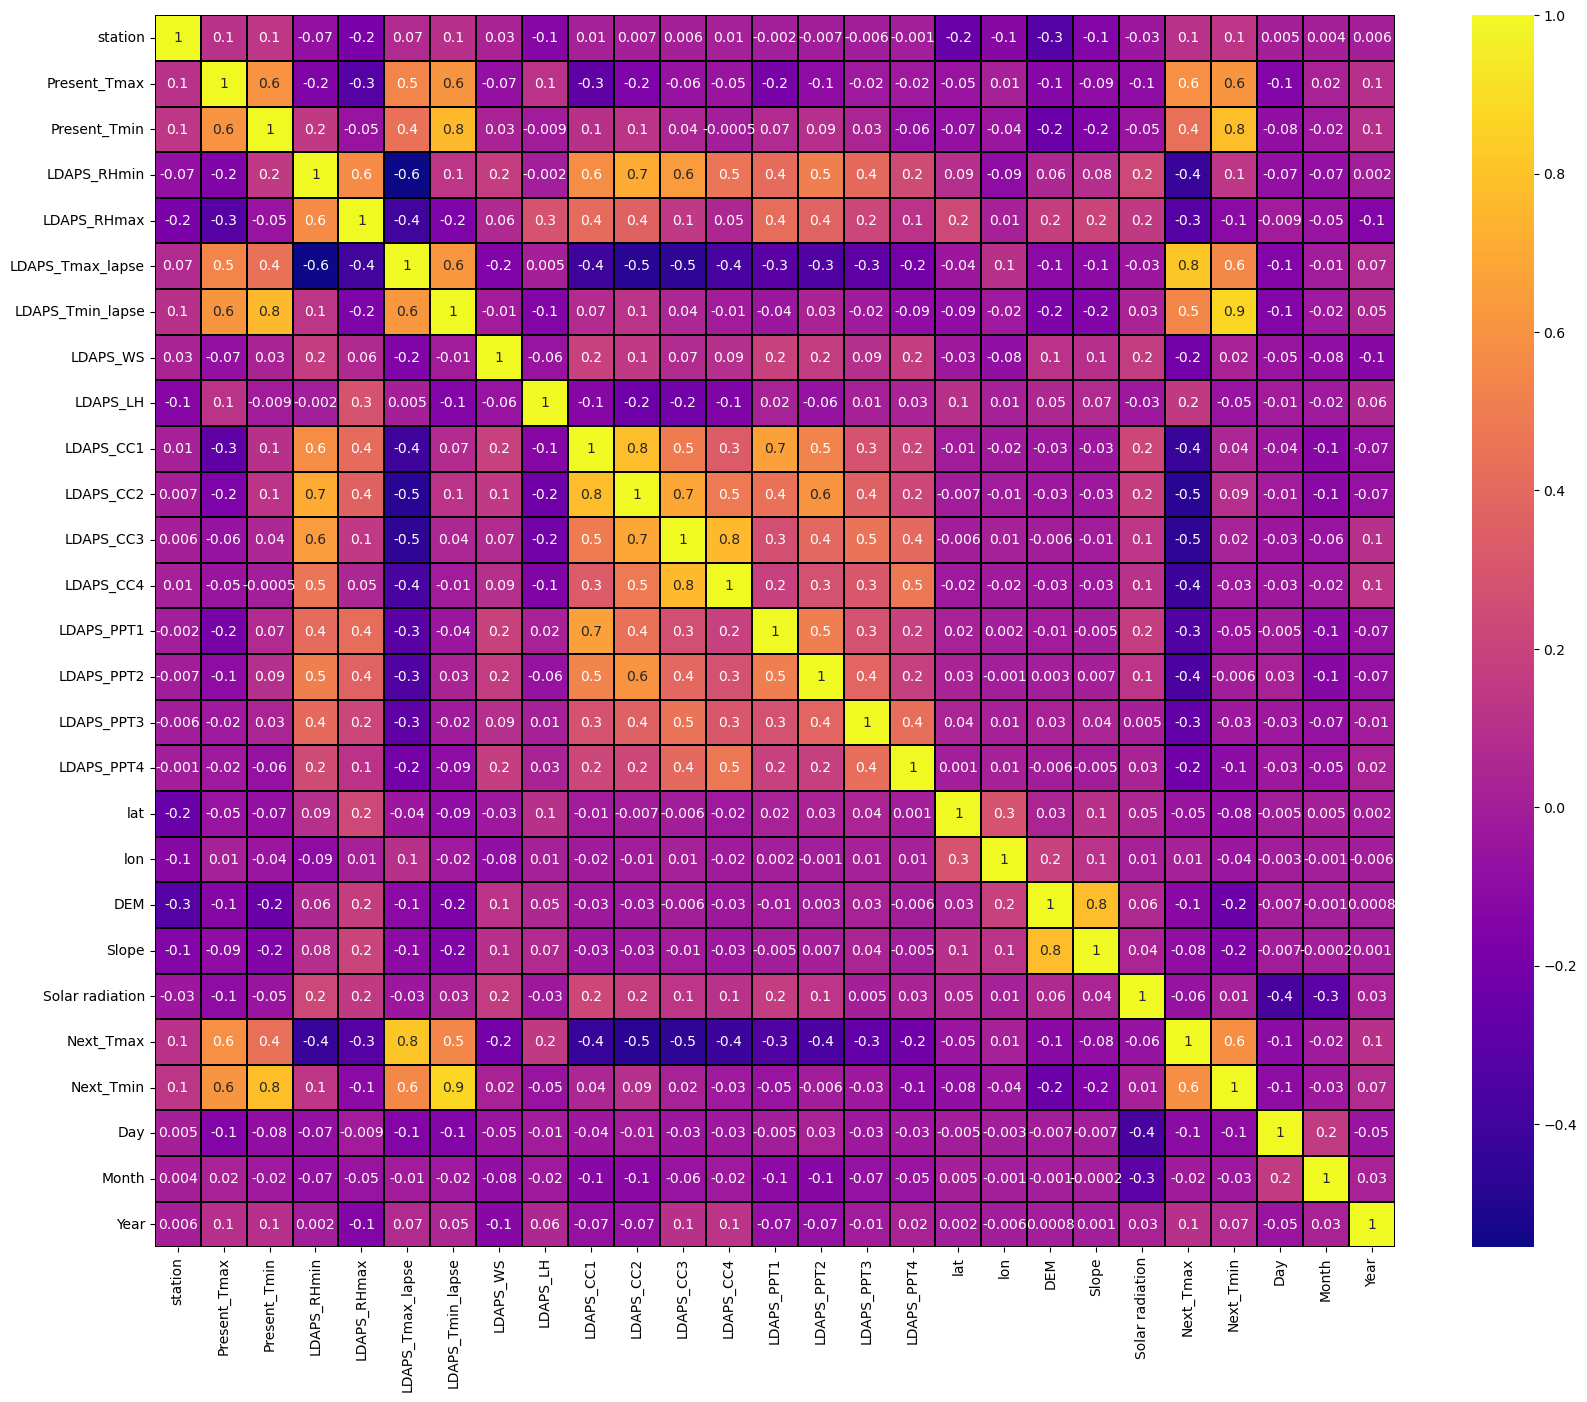

In [145]:
#Visualize the correlation between features and label
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='plasma')
plt.show()

Observations:

The label "Next_Tmax" has high positive correlation with the features "Present_Tmax", "LDAPS_Tmax_lapse" and "Next_Tmin".

There is high positive correlation between some of the features.

In [146]:
#Check the correlation of features with the label
cor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.817058
Present_Tmax        0.587192
Next_Tmin           0.581613
LDAPS_Tmin_lapse    0.547178
Present_Tmin        0.439660
LDAPS_LH            0.150952
station             0.107094
Year                0.101169
lon                 0.010557
Month              -0.018883
lat                -0.049168
Solar radiation    -0.060271
Slope              -0.084751
Day                -0.105551
DEM                -0.117933
LDAPS_WS           -0.206670
LDAPS_PPT4         -0.218746
LDAPS_PPT3         -0.268968
LDAPS_RHmax        -0.323398
LDAPS_PPT1         -0.347535
LDAPS_PPT2         -0.356795
LDAPS_CC4          -0.416127
LDAPS_CC1          -0.430631
LDAPS_RHmin        -0.433807
LDAPS_CC3          -0.464943
LDAPS_CC2          -0.476701
Name: Next_Tmax, dtype: float64

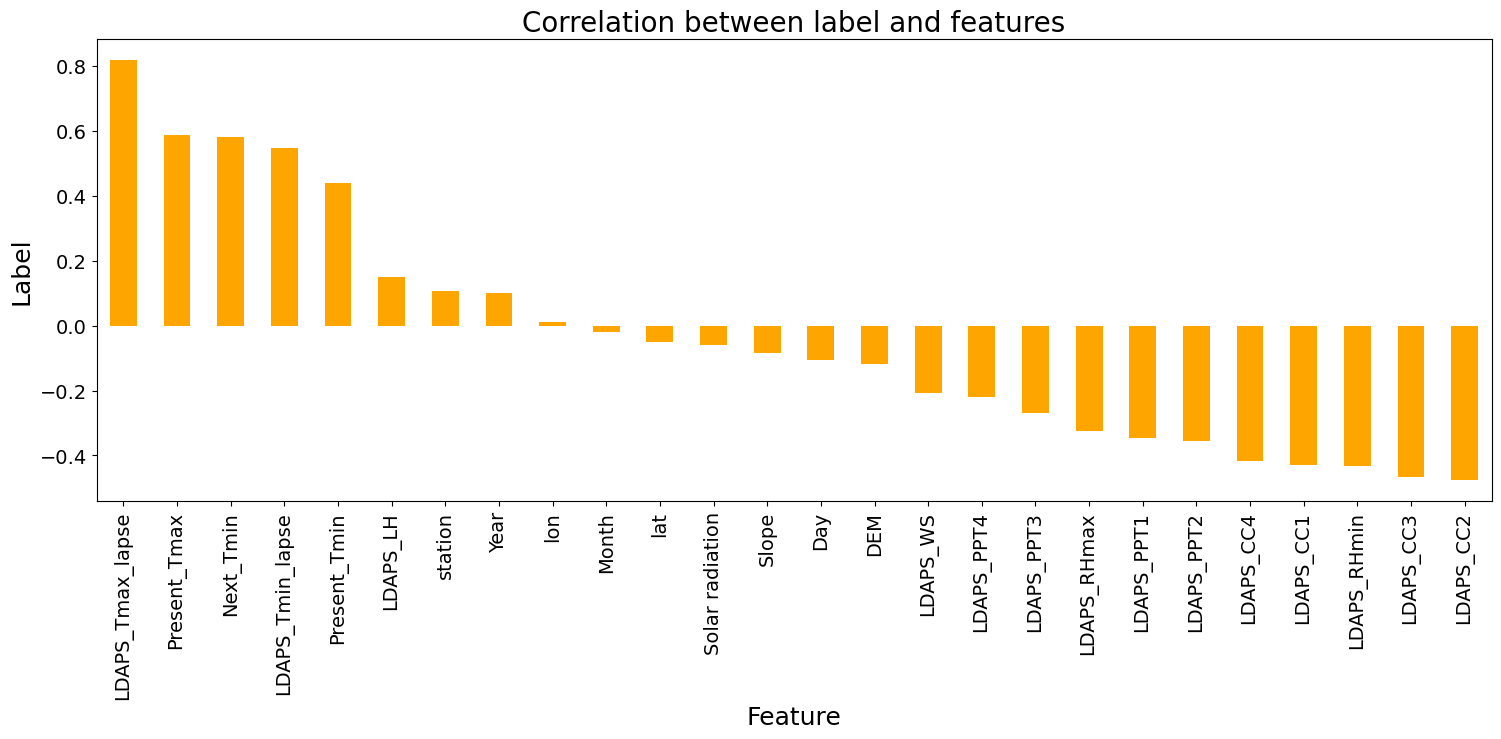

In [147]:
#Visualize the corrlation of features with the label
plt.figure(figsize=(18,6))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Label',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation between label and features',fontsize=20)
plt.show()

We can see that there is very low correlation between the label "Next_Tmax" and the features "lon" and "Momth".

Separating features and label

In [148]:
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']

Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672247     -0.425379     -0.813497     0.195832     0.348143   
1    -1.533506      0.690369     -0.726877    -0.236706     0.261030   
2    -1.394764      0.585768      0.009395    -0.494608    -0.717489   
3    -1.256023      0.725237      0.052705     0.194685     1.375160   
4    -1.117281      0.516034     -0.596947     0.045578     0.185940   
...        ...           ...           ...          ...          ...   
6735  1.102584     -2.377939     -2.372660    -2.227094    -1.363567   
6736  1.241325     -2.587142     -2.545900    -1.836886    -0.753552   
6737  1.380067     -2.308205     -2.675830    -2.078953    -1.302385   
6738  1.518808     -2.308205     -2.415970    -2.273895    -1.457264   
6739  1.657550     -2.343072     -2.545900    -2.353846    -1.462114   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.661843         -0.289275  0.176574  0.349745  -0.307692  ...   
1            -0.016305          0.171731 -0.574780 -0.167026  -0.348915  ...   
2             0.071120          0.409672 -0.252302 -1.378432  -0.429487  ...   
3            -0.069377         -0.146121 -0.606954  0.245684  -0.394190  ...   
4            -0.284011         -0.074239 -0.541994  1.297828  -0.736964  ...   
...                ...               ...       ...       ...        ...  ...   
6735         -0.756827         -2.398594  0.048021 -2.013059  -1.337865  ...   
6736         -1.159353         -2.617859 -0.517089  0.685457  -1.248528  ...   
6737         -1.287554         -2.186643 -0.245011  0.420961  -1.493896  ...   
6738         -1.048423         -2.205548  0.010835 -0.319474  -1.453393  ...   
6739         -0.710746         -2.299964  0.436483 -2.050219  -1.364319  ...   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.414627  1.210944  0.002925  1.853755  1.327541         1.891505   
1      -0.414627  1.210944  0.518771  0.069427 -0.376107         1.431059   
2      -0.414627  0.671264  0.845892 -0.353635 -0.944238         1.410499   
3      -0.414627  2.018464  0.392955  0.098484  1.248879         1.387056   
4      -0.414627  0.133584  1.814676 -0.279030 -0.392611         1.396247   
...          ...       ...       ...       ...       ...              ...   
6735   -0.414627  0.133584  0.619424 -0.713054 -0.269624        -1.763558   
6736   -0.414627 -0.675936  1.198177 -0.999655 -1.353613        -1.781107   
6737   -0.414627 -0.136256 -1.255235 -1.576591 -1.278529        -1.779254   
6738   -0.414627 -0.406096 -1.028766 -1.397536 -1.069107        -1.785308   
6739   -0.414627 -0.406096 -0.261289 -1.188279 -0.929998        -1.769356   

      Next_Tmin       Day    Month      Year  
0     -0.789567  1.673763 -0.47961 -1.421631  
1     -0.238510  1.673763 -0.47961 -1.421631  
2      0.354935  1.673763 -0.47961 -1.421631  
3      0.524491  1.673763 -0.47961 -1.421631  
4     -0.238510  1.673763 -0.47961 -1.421631  
...         ...       ...      ...       ...  
6735  -2.273180  1.673763  0.41017  1.442881  
6736  -2.527514  1.673763  0.41017  1.442881  
6737  -2.103625  1.673763  0.41017  1.442881  
6738  -1.806902  1.673763  0.41017  1.442881  
6739  -2.400347  1.673763  0.41017  1.442881  

[6740 rows x 26 columns]

Now, we have done feature scaling to overcome the issue of biasness in the model.

Checking Variance Inflation Factor (VIF)

In [151]:
#Find out Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF Values          Features
0     1.291141           station
1     2.877559      Present_Tmax
2     3.377813      Present_Tmin
3     6.099519       LDAPS_RHmin
4     2.601697       LDAPS_RHmax
5     6.984728  LDAPS_Tmax_lapse
6     8.828221  LDAPS_Tmin_lapse
7     1.226225          LDAPS_WS
8     1.502329          LDAPS_LH
9     4.426220         LDAPS_CC1
10    5.172786         LDAPS_CC2
11    4.586997         LDAPS_CC3
12    2.796506         LDAPS_CC4
13    2.232150        LDAPS_PPT1
14    1.969169        LDAPS_PPT2
15    1.596241        LDAPS_PPT3
16    1.609446        LDAPS_PPT4
17    1.297821               lat
18    1.225442               lon
19    3.389969               DEM
20    2.876965             Slope
21    1.452846   Solar radiation
22    5.712065         Next_Tmin
23    1.263878               Day
24    1.133688             Month
25    1.134795              Year

We check VIF values to find out if there is any multicollinearity problem with the features which we need to solve. In the above table, we can see that none of the features have VIF values greater than 10. So, we can conclude that there is no multicollinearity problem with the features and hence we can proceed further.

# Model Building

Finding the best random state

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    DTR=DecisionTreeRegressor()
    DTR.fit(x_train,y_train)
    pred=DTR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 Score is ",maxAccu,"on Random State ",maxRS)

Maximum R2 Score is  0.8069652618322934 on Random State  188


Creating train test split

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Importing the necessary modules

In [154]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [155]:
#Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_DTR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_DTR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score:  0.8055106101628318
R2_score on training data:  1.0
Mean Absolute Error:  0.9536102868447083
Mean Squared Error:  1.6801978239366961
Root Mean Squared Error:  1.2962244496755553


In [156]:
#Linear Regression
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_LR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:  0.7858916757244264
R2_score on training data:  0.7861036319731717
Mean Absolute Error:  1.05291097202306
Mean Squared Error:  1.8496862005466672
Root Mean Squared Error:  1.360031691008216


In [157]:
#XGB Regressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred_XGB=XGB.predict(x_test)
pred_train=XGB.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_XGB))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_XGB))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_XGB))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_XGB)))

R2_score:  0.9245676606041511
R2_score on training data:  0.9944076325117933
Mean Absolute Error:  0.6188567149297184
Mean Squared Error:  0.651661525667137
Root Mean Squared Error:  0.8072555516483841


In [158]:
#Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_svr))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score:  0.885824548819196
R2_score on training data:  0.9109281324171938
Mean Absolute Error:  0.7177702029022788
Mean Squared Error:  0.9863640622328482
Root Mean Squared Error:  0.9931586289374161


In [159]:
#Gradient Boosting Regressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_GBR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:  0.8626464626232345
R2_score on training data:  0.8855091823554779
Mean Absolute Error:  0.8473386562931399
Mean Squared Error:  1.1866000238042045
Root Mean Squared Error:  1.089311720217957


In [160]:
#AdaBoost Regressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred_ABR=ABR.predict(x_test)
pred_train=ABR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_ABR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_ABR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_ABR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score:  0.7532217945870995
R2_score on training data:  0.7660451080211184
Mean Absolute Error:  1.181924520901029
Mean Squared Error:  2.1319219731055927
Root Mean Squared Error:  1.4601102605986962


In [161]:
#Bagging Regressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
pred_BR=BR.predict(x_test)
pred_train=BR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_BR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_BR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_BR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_BR)))

R2_score:  0.8858270753582161
R2_score on training data:  0.9780169079904342
Mean Absolute Error:  0.7531849653808111
Mean Squared Error:  0.9863422354104847
Root Mean Squared Error:  0.993147640288434


In [162]:
#KNeighbors Regressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_train=KNN.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_KNN))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_KNN))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_KNN))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score:  0.8843237177603649
R2_score on training data:  0.920345281648599
Mean Absolute Error:  0.7411275964391691
Mean Squared Error:  0.9993297725024727
Root Mean Squared Error:  0.9996648300817993


# Cross Validation

In [163]:
from sklearn.model_selection import cross_val_score

In [164]:
#Cross Validation of Decison Tree Regressor model
score=cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_DTR)-score.mean())*100)

[0.39459222 0.44174988 0.38260604 0.5203356  0.36692422]
0.42124159259812777
Difference between R2 score and cross validation score is -  38.4269017564704


In [165]:
#Cross Validation of Linear Regression model
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.73473842 0.66759485 0.69982578 0.76308139 0.56725583]
0.6864992535693093
Difference between R2 score and cross validation score is -  9.939242215511712


In [166]:
#Cross Validation of XGB Regressor model
score=cross_val_score(XGB,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_XGB)-score.mean())*100)

[0.70113229 0.62019716 0.67029608 0.740107   0.62516225]
0.6713789554214714
Difference between R2 score and cross validation score is -  25.318870518267968


In [167]:
#Checking CV score for Support Vector Machine Regressor
score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_svr)-score.mean())*100)

[0.744153   0.56332008 0.69893304 0.79440773 0.59660811]
0.6794843928629646
Difference between R2 score and cross validation score is -  20.634015595623147


In [168]:
#Cross Validation of Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.75016777 0.66860337 0.69548666 0.77767805 0.63827387]
0.706041944050807
Difference between R2 score and cross validation score is -  15.660451857242752


In [169]:
#Cross Validation of AdaBoost Regressor model
score=cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_ABR)-score.mean())*100)

[0.69260549 0.62894503 0.67644987 0.7093542  0.62017339]
0.6655055942849291
Difference between R2 score and cross validation score is -  8.771620030217042


In [170]:
#Cross Validation of Bagging Regressor model
score=cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_BR)-score.mean())*100)

[0.6860464  0.62691864 0.65933677 0.71315169 0.61556656]
0.6602040126747806
Difference between R2 score and cross validation score is -  22.56230626834356


In [171]:
#Cross Validation of KNeighbors Regressor model
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_KNN)-score.mean())*100)

[0.54003789 0.42746163 0.49973328 0.65404715 0.53816425]
0.5318888399390682
Difference between R2 score and cross validation score is -  35.24348778212967


AdaBoost Regressor model is our best performing model as the difference between R2 score and cross validation score for this model is the least among all the models.

# Hyper Parameter Tuning

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
from scipy.stats import uniform, randint
param={'n_estimators': randint(50, 500),
       'learning_rate': uniform(0.01, 1.0),
       'loss': ['linear', 'square', 'exponential'],
       'random_state': randint(1, 100),
       'estimator': [DecisionTreeRegressor(max_depth=d) for d in range(1, 11)]
      }
RCV=RandomizedSearchCV(AdaBoostRegressor(),param,cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'estimator': [DecisionTreeRegressor(max_depth=1),
                                                      DecisionTreeRegressor(max_depth=2),
                                                      DecisionTreeRegressor(max_depth=3),
                                                      DecisionTreeRegressor(max_depth=4),
                                                      DecisionTreeRegressor(max_depth=5),
                                                      DecisionTreeRegressor(max_depth=6),
                                                      DecisionTreeRegressor(max_depth=7),
                                                      DecisionTreeRegre...
                                                      DecisionTreeRegressor(max_depth=10)],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021691B29550>,
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021691B3E250>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021695099350>})

In [175]:
RCV.best_params_

{'estimator': DecisionTreeRegressor(max_depth=10),
 'learning_rate': 0.9684014725300988,
 'loss': 'exponential',
 'n_estimators': 252,
 'random_state': 23}

# Building the Final Model

In [176]:
final_model=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                              learning_rate=0.9684014725300988,
                              loss='exponential',
                              n_estimators=252,
                              random_state=23
                             )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("R2_score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.9156043228279346
Mean Absolute Error:  0.6479326114340699
Mean Squared Error:  0.7290959843767736
Root Mean Squared Error:  0.8538711755158231


The R2 score for the final model has improved very much and it is 91.56%

In [177]:
#Save the model
import pickle
filename='Temperature_Forecast_Next_Tmax.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [178]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Temperature_Forecast_Next_Tmax.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Loaded model's score: ",result*100)

Loaded model's score:  91.56043228279346


In [181]:
#Prediction using the loaded model
df2=pd.DataFrame()
df2['Original']=y_test
df2['Predicted']=loaded_model.predict(x_test)
df2.reset_index(drop=True,inplace=True)
df2

Original  Predicted
0         30.0  29.271429
1         28.8  28.692857
2         29.2  28.531429
3         32.0  30.680769
4         35.1  34.000000
...        ...        ...
2017      33.9  32.245455
2018      27.9  28.060000
2019      34.4  33.021429
2020      33.3  32.287500
2021      30.8  30.323256

[2022 rows x 2 columns]

# Prediction of the label "Next_Tmin"

We will copy the dataset df1, which was kept aside for prediction of the label "Next_Tmin", back to df.

In [220]:
df=df1.copy()

In [221]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin   Day  Month    Year  
0          21.2  30.0    6.0  2013.0  
1          22.5  30.0    6.0  2013.0  
2          23.9  30.0    6.0  2013.0  
3          24.3  30.0    6.0  2013.0  
4          22.5  30.0    6.0  2013.0  
...         ...   ...    ...     ...  
7745       17.7  30.0    8.0  2017.0  
7746       17.1  30.0    8.0  2017.0  
7747       18.1  30.0    8.0  2017.0  
7748       18.8  30.0    8.0  2017.0  
7749       17.4  30.0    8.0  2017.0  

[7588 rows x 27 columns]

Checking for Outliers

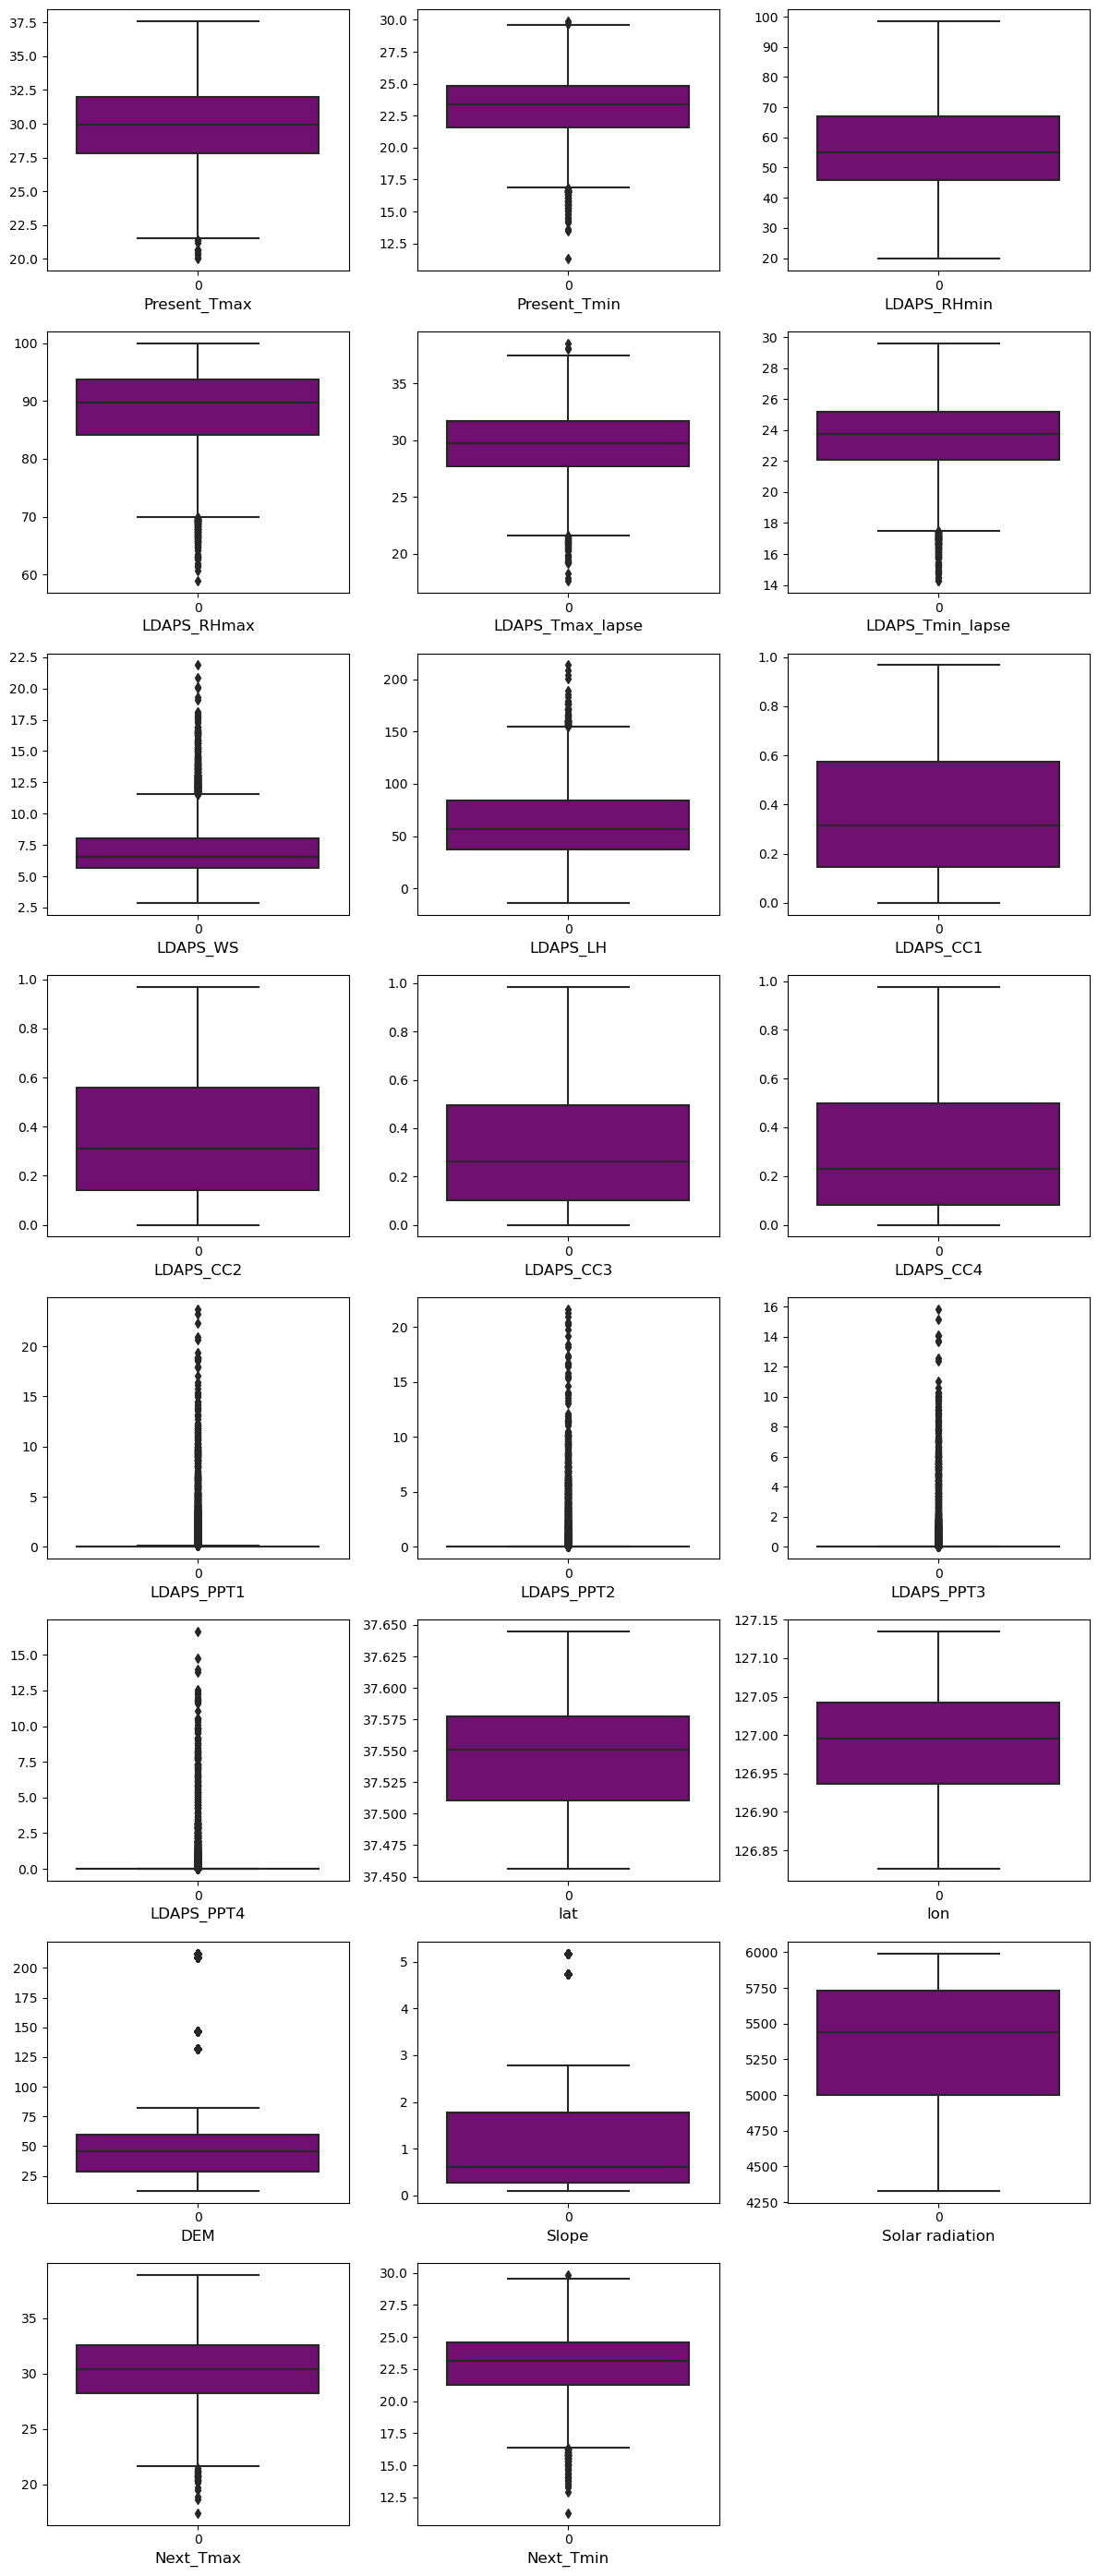

In [222]:
#Check for outliers in continuous data columns
plt.figure(figsize=(12,28),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(8,3,plotnumber)
    sns.boxplot(df[col],color="purple")
    plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see that there are outliers in the columns "Present_Tmax", "Present_Tmin", "LDAPS_RHmax", "LDAPS_Tmax_lapse", "LDAPS_Tmin_lapse", "LDAPS_WS", "LDAPS_LH", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4", "DEM", "Slope", "Next_Tmax" and "Next_Tmin". We can't remove outliers from the label "Next_Tmin". So, we will remove outliers from the other columns using Z-Score technique.

In [223]:
#Remove outliers
from scipy.stats import zscore
out_features=df[["Present_Tmax","Present_Tmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","DEM","Slope","Next_Tmax"]]
z=np.abs(zscore(out_features))
df2=df[(z<3).all(axis=1)]

In [224]:
df2.shape

(6751, 27)

In [225]:
print("Data loss percentage - ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data loss percentage -  11.0305745914602


The data loss percentage is 11.03% which is more than 10% but since our dataset is very large we can accept this amount of data loss. So, we will copy the changed dataset df2 into the original dataset df.

In [226]:
df=df2.copy()

Checking for Skewness

In [227]:
df.skew()

station            -0.002207
Present_Tmax       -0.272328
Present_Tmin       -0.225869
LDAPS_RHmin         0.310753
LDAPS_RHmax        -0.683232
LDAPS_Tmax_lapse   -0.107765
LDAPS_Tmin_lapse   -0.391230
LDAPS_WS            1.084131
LDAPS_LH            0.564391
LDAPS_CC1           0.595302
LDAPS_CC2           0.506508
LDAPS_CC3           0.703262
LDAPS_CC4           0.710210
LDAPS_PPT1          3.728311
LDAPS_PPT2          4.859731
LDAPS_PPT3          5.522134
LDAPS_PPT4          5.929946
lat                 0.105278
lon                -0.278214
DEM                 1.762968
Slope               1.589489
Solar radiation    -0.518760
Next_Tmax          -0.264408
Next_Tmin          -0.288243
Day                 0.254303
Month              -0.681742
Year                0.023039
dtype: float64

We can see positive and negative skewness in many of the columns. We can't remove skewness from the label "Next_Tmin" and categorical columns. So, we will make a list of columns from which skewness has to be removed and apply different transformation methods to remove or reduce skewness from these columns.

In [228]:
#Copy df into a new dataset for checking different transformation methods
skew_df=df.copy()

In [229]:
#List of columns for removing skewness
skew_col=["LDAPS_RHmax","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","DEM","Slope","Solar radiation"]

Apply Yeo-Johnson transformation method to remove skewness

In [230]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
skew_df[skew_col]=pt.fit_transform(skew_df[skew_col])

In [231]:
skew_df.skew()

station            -0.002207
Present_Tmax       -0.272328
Present_Tmin       -0.225869
LDAPS_RHmin         0.310753
LDAPS_RHmax        -0.103278
LDAPS_Tmax_lapse   -0.107765
LDAPS_Tmin_lapse   -0.391230
LDAPS_WS            0.007702
LDAPS_LH           -0.031267
LDAPS_CC1           0.065400
LDAPS_CC2           0.050331
LDAPS_CC3           0.094853
LDAPS_CC4           0.142501
LDAPS_PPT1          1.618648
LDAPS_PPT2          1.822457
LDAPS_PPT3          1.997528
LDAPS_PPT4          2.270299
lat                 0.105278
lon                -0.278214
DEM                 0.038699
Slope               0.233673
Solar radiation    -0.172247
Next_Tmax          -0.264408
Next_Tmin          -0.288243
Day                 0.254303
Month              -0.681742
Year                0.023039
dtype: float64

So, we have removed skewness from all the columns as much as we can.

In [233]:
#Copy the changed dataset skew_df into the original dataset df
df=skew_df.copy()

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6751 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           6751 non-null   float64
 1   Present_Tmax      6751 non-null   float64
 2   Present_Tmin      6751 non-null   float64
 3   LDAPS_RHmin       6751 non-null   float64
 4   LDAPS_RHmax       6751 non-null   float64
 5   LDAPS_Tmax_lapse  6751 non-null   float64
 6   LDAPS_Tmin_lapse  6751 non-null   float64
 7   LDAPS_WS          6751 non-null   float64
 8   LDAPS_LH          6751 non-null   float64
 9   LDAPS_CC1         6751 non-null   float64
 10  LDAPS_CC2         6751 non-null   float64
 11  LDAPS_CC3         6751 non-null   float64
 12  LDAPS_CC4         6751 non-null   float64
 13  LDAPS_PPT1        6751 non-null   float64
 14  LDAPS_PPT2        6751 non-null   float64
 15  LDAPS_PPT3        6751 non-null   float64
 16  LDAPS_PPT4        6751 non-null   float64


In [235]:
#Statistical summary of numerical columns
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin   LDAPS_RHmax  \
count  6751.000000   6751.000000   6751.000000  6751.000000  6.751000e+03   
mean     13.053918     29.915064     23.271323    55.511463 -2.862800e-16   
std       7.204591      2.871642      2.314263    13.863421  1.000074e+00   
min       1.000000     21.200000     16.100000    19.794666 -2.236229e+00   
25%       7.000000     28.000000     21.700000    45.534916 -7.423149e-01   
50%      13.000000     30.000000     23.400000    54.090717  4.165303e-02   
75%      19.000000     32.100000     24.900000    65.061901  7.682648e-01   
max      25.000000     37.600000     29.900000    96.169815  2.169125e+00   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse      LDAPS_WS      LDAPS_LH  \
count       6751.000000       6751.000000  6.751000e+03  6.751000e+03   
mean          29.891988         23.643015  2.610200e-16  4.757300e-16   
std            2.751346          2.240003  1.000074e+00  1.000074e+00   
min           21.195428         16.558304 -4.023159e+00 -7.238927e+00   
25%           27.999461         22.190288 -6.344450e-01 -7.039191e-01   
50%           29.932597         23.861492 -5.280382e-02 -1.896768e-02   
75%           31.842923         25.210113  6.638072e-01  7.435004e-01   
max           38.140534         29.619342  2.438020e+00  2.402986e+00   

          LDAPS_CC1  ...          lat          lon           DEM  \
count  6.751000e+03  ...  6751.000000  6751.000000  6.751000e+03   
mean  -6.736000e-17  ...    37.544020   126.990845  7.727981e-16   
std    1.000074e+00  ...     0.050089     0.079484  1.000074e+00   
min   -1.706736e+00  ...    37.456200   126.826000 -1.988151e+00   
25%   -8.268811e-01  ...    37.510200   126.937000 -5.791434e-01   
50%   -2.464925e-02  ...    37.550700   126.995000  9.722729e-02   
75%    7.628269e-01  ...    37.577600   127.042000  4.555634e-01   
max    1.918418e+00  ...    37.645000   127.135000  1.853607e+00   

              Slope  Solar radiation    Next_Tmax    Next_Tmin          Day  \
count  6.751000e+03     6.751000e+03  6751.000000  6751.000000  6751.000000   
mean  -1.473500e-17    -3.368000e-16    30.527433    23.048808    16.272848   
std    1.000074e+00     1.000074e+00     2.924509     2.382356     8.209817   
min   -1.477958e+00    -1.861862e+00    21.100000    13.300000     7.000000   
25%   -9.307947e-01    -8.748082e-01    28.600000    21.500000     8.000000   
50%   -1.916904e-01     7.695521e-02    30.700000    23.200000    16.000000   
75%    9.160047e-01     9.210514e-01    32.700000    24.700000    24.000000   
max    1.752530e+00     1.889497e+00    38.900000    29.800000    31.000000   

             Month         Year  
count  6751.000000  6751.000000  
mean      7.077174  2014.986521  
std       2.248252     1.396067  
min       1.000000  2013.000000  
25%       7.000000  2014.000000  
50%       7.000000  2015.000000  
75%       8.000000  2016.000000  
max      12.000000  2017.000000  

[8 rows x 27 columns]

Observations:

Now, we can see that there is not much skewness in the continuous features as the mean is almost equal to the median (50%) in these columns.

Also, outliers from all the continuous features have been removed due to which max is not mucn bigger than 75% in the continuous features.

In [236]:
#Check the correlation between features and label
cor=df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110648      0.133642    -0.069176   
Present_Tmax      0.110648      1.000000      0.611751    -0.151404   
Present_Tmin      0.133642      0.611751      1.000000     0.154781   
LDAPS_RHmin      -0.069176     -0.151404      0.154781     1.000000   
LDAPS_RHmax      -0.181227     -0.316046     -0.049088     0.566862   
LDAPS_Tmax_lapse  0.066911      0.541098      0.442890    -0.552414   
LDAPS_Tmin_lapse  0.104068      0.617585      0.765936     0.134051   
LDAPS_WS          0.029578     -0.073233      0.032631     0.170720   
LDAPS_LH         -0.135108      0.117077     -0.011510    -0.004507   
LDAPS_CC1         0.012017     -0.284151      0.107100     0.581184   
LDAPS_CC2         0.007937     -0.159992      0.126457     0.704183   
LDAPS_CC3         0.006478     -0.060289      0.045224     0.636348   
LDAPS_CC4         0.011149     -0.049146      0.002267     0.459837   
LDAPS_PPT1       -0.001507     -0.188401      0.069691     0.411234   
LDAPS_PPT2       -0.006730     -0.096257      0.091435     0.510456   
LDAPS_PPT3       -0.004832     -0.021397      0.037345     0.405992   
LDAPS_PPT4       -0.000241     -0.020487     -0.061822     0.244667   
lat              -0.240991     -0.051276     -0.072195     0.089764   
lon              -0.122262      0.010551     -0.044547    -0.094762   
DEM              -0.325678     -0.132173     -0.240575     0.055633   
Slope            -0.145866     -0.093493     -0.159210     0.082409   
Solar radiation  -0.034232     -0.097382     -0.043985     0.229971   
Next_Tmax         0.106486      0.587395      0.440253    -0.430853   
Next_Tmin         0.128042      0.614736      0.786430     0.140446   
Day               0.004796     -0.137842     -0.078502    -0.071193   
Month             0.003392      0.022634     -0.020633    -0.074150   
Year              0.006465      0.097908      0.096894     0.000328   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.181227          0.066911          0.104068  0.029578   
Present_Tmax        -0.316046          0.541098          0.617585 -0.073233   
Present_Tmin        -0.049088          0.442890          0.765936  0.032631   
LDAPS_RHmin          0.566862         -0.552414          0.134051  0.170720   
LDAPS_RHmax          1.000000         -0.401066         -0.157204  0.059812   
LDAPS_Tmax_lapse    -0.401066          1.000000          0.621220 -0.155140   
LDAPS_Tmin_lapse    -0.157204          0.621220          1.000000 -0.013177   
LDAPS_WS             0.059812         -0.155140         -0.013177  1.000000   
LDAPS_LH             0.283980          0.004410         -0.144896 -0.055750   
LDAPS_CC1            0.416251         -0.402380          0.078719  0.189063   
LDAPS_CC2            0.365959         -0.479875          0.120963  0.146722   
LDAPS_CC3            0.144221         -0.466890          0.045771  0.065438   
LDAPS_CC4            0.047164         -0.365848         -0.007244  0.091234   
LDAPS_PPT1           0.420474         -0.306868         -0.041113  0.196687   
LDAPS_PPT2           0.368464         -0.343634          0.035572  0.165721   
LDAPS_PPT3           0.219909         -0.284313         -0.016644  0.089003   
LDAPS_PPT4           0.118721         -0.206462         -0.084164  0.167519   
lat                  0.231937         -0.038272         -0.090342 -0.027203   
lon                  0.012646          0.105323         -0.026418 -0.077370   
DEM                  0.172242         -0.111506         -0.172068  0.113329   
Slope                0.207454         -0.105941         -0.157718  0.095394   
Solar radiation      0.155079         -0.032740          0.035731  0.162759   
Next_Tmax           -0.320801          0.817076          0.547187 -0.206730   
Next_Tmin           -0.102635          0.552442          0.876394  0.020618   
Day                 -0.010238         -0.141468        

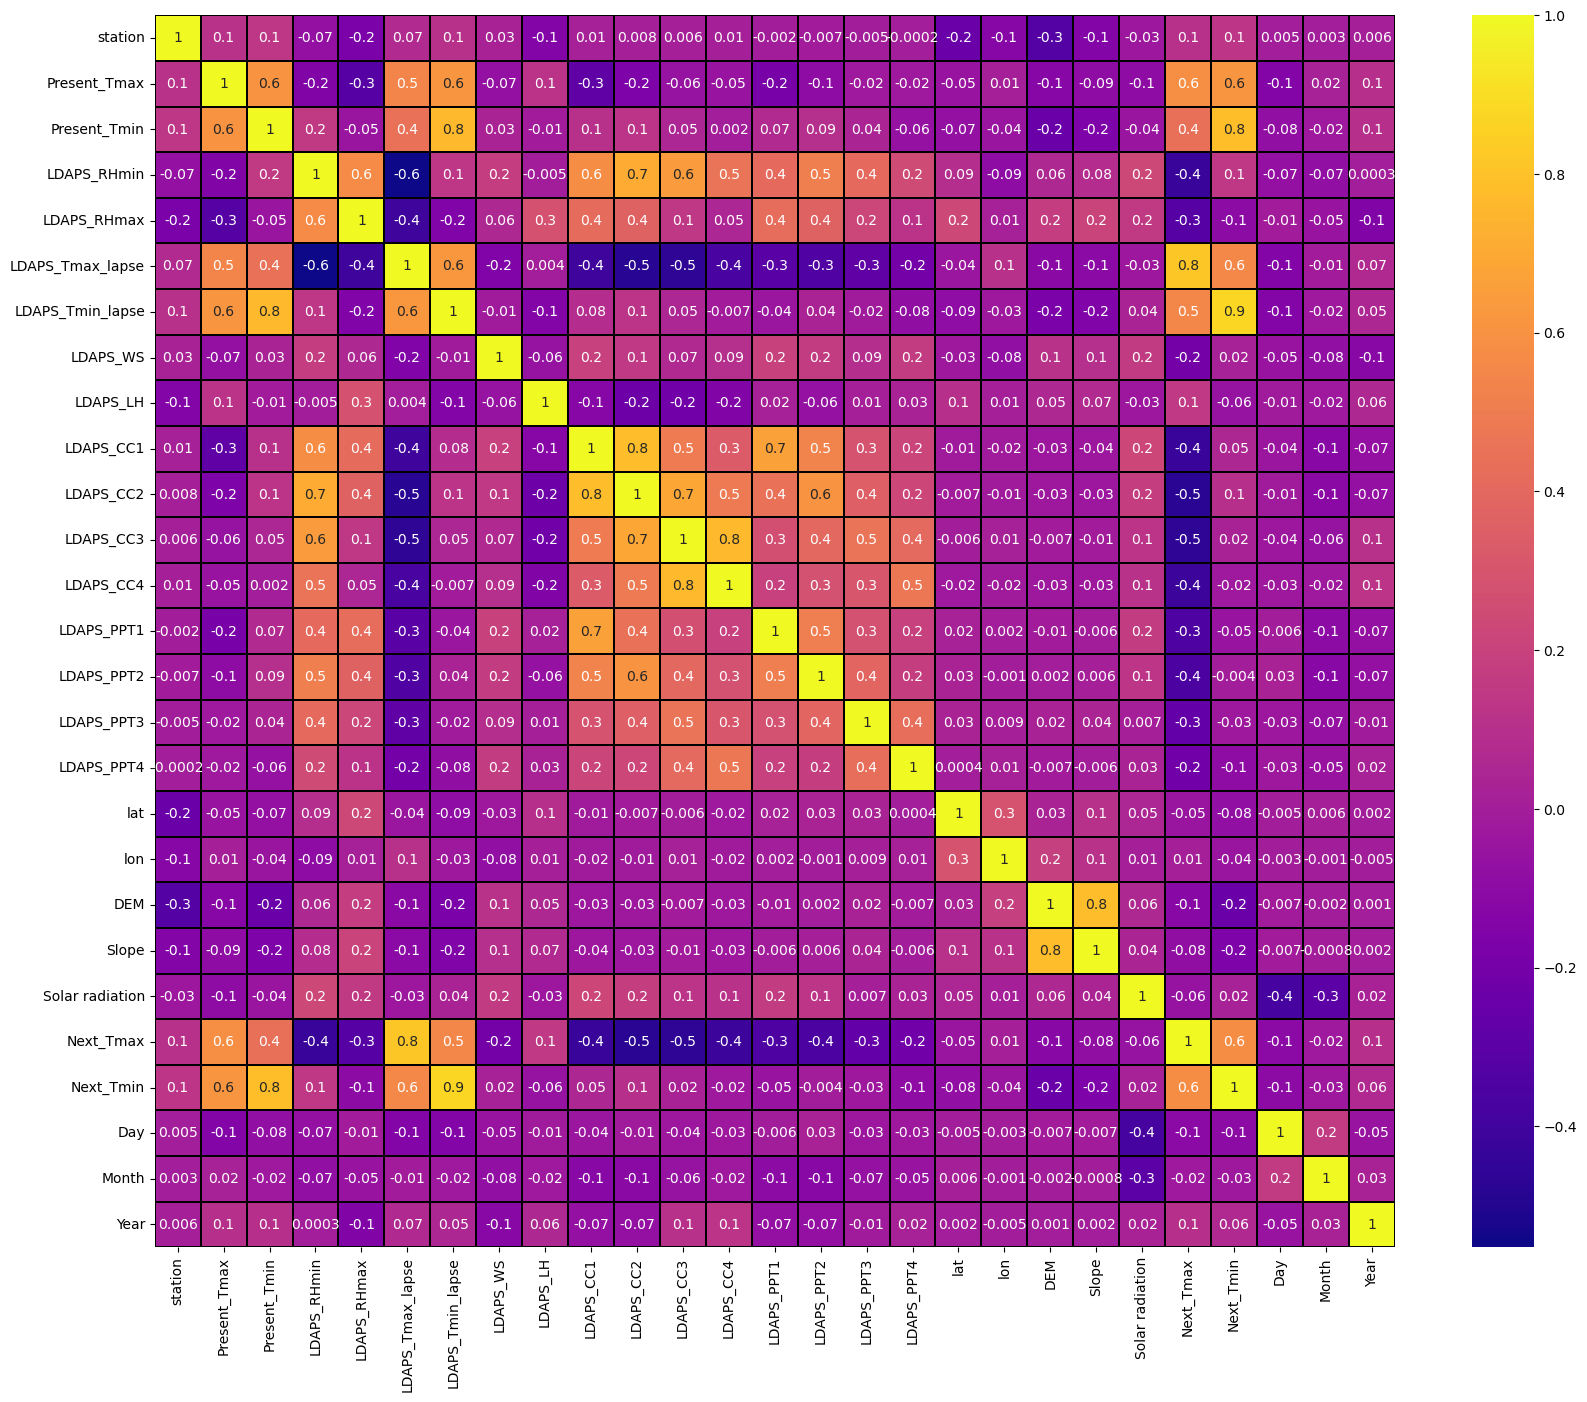

In [237]:
#Visualize the correlation between features and label
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='plasma')
plt.show()

Observations:

The label "Next_Tmin" has high positive correlation with the features "Present_Tmax", "Present_Tmin", "LDAPS_Tmax_lapse", "LDAPS_Tmin_lapse" and "Next_Tmax".

There is high positive correlation between some of the features.

In [239]:
#Check the correlation of features with the label
cor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.876394
Present_Tmin        0.786430
Present_Tmax        0.614736
Next_Tmax           0.580079
LDAPS_Tmax_lapse    0.552442
LDAPS_RHmin         0.140446
station             0.128042
LDAPS_CC2           0.100578
Year                0.064572
LDAPS_CC1           0.048880
LDAPS_CC3           0.024973
LDAPS_WS            0.020618
Solar radiation     0.018401
LDAPS_PPT2         -0.003600
LDAPS_CC4          -0.022048
LDAPS_PPT3         -0.026676
Month              -0.028980
lon                -0.044646
LDAPS_PPT1         -0.050477
LDAPS_LH           -0.057798
lat                -0.076819
LDAPS_PPT4         -0.097048
Day                -0.102256
LDAPS_RHmax        -0.102635
Slope              -0.159338
DEM                -0.239932
Name: Next_Tmin, dtype: float64

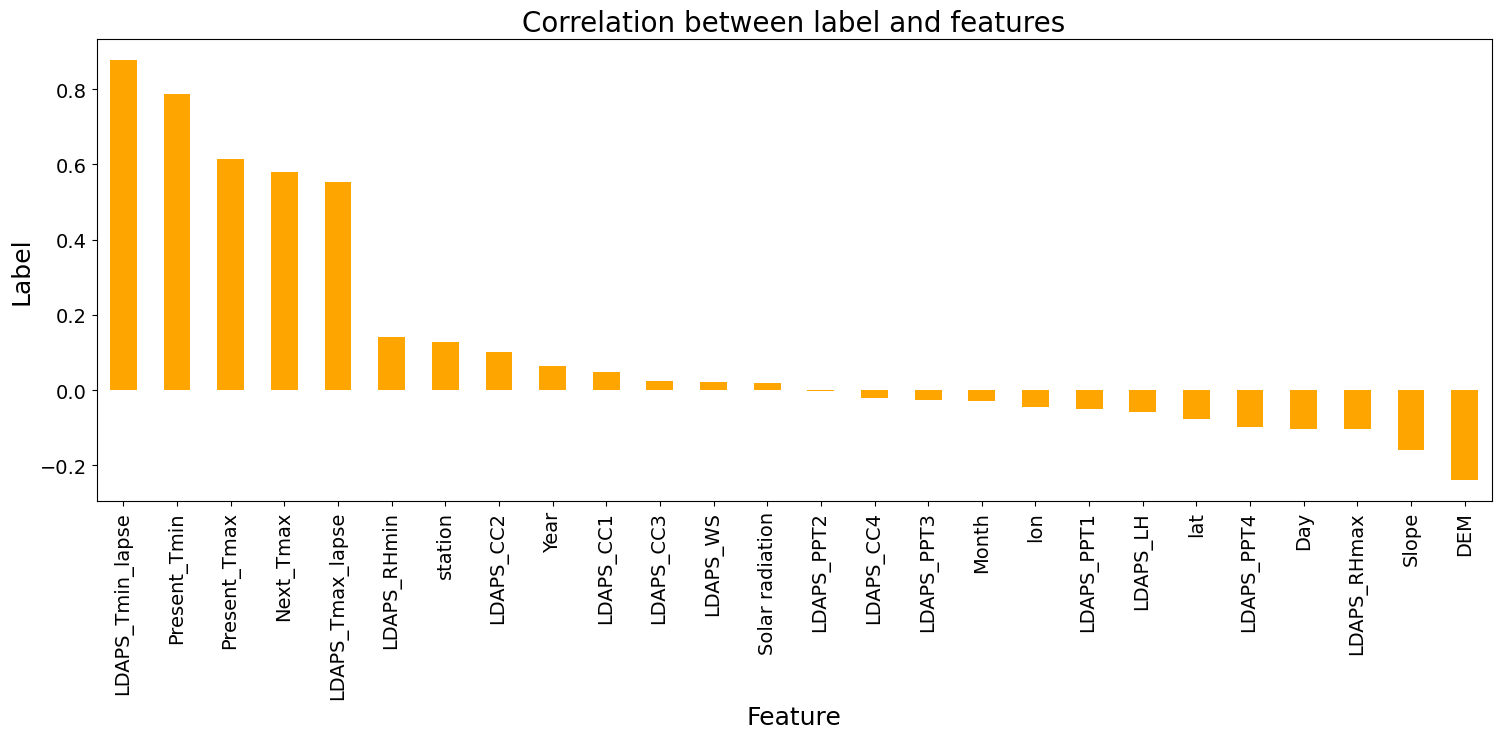

In [240]:
#Visualize the corrlation of features with the label
plt.figure(figsize=(18,6))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Label',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation between label and features',fontsize=20)
plt.show()

We can see that there is very low correlation between the label "Next_Tmin" and the features "LDAPS_PPT2" and "Solar radiation".

Separating features and label

In [241]:
x=df.drop('Next_Tmin',axis=1)
y=df['Next_Tmin']

Feature Scaling

In [242]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.673212     -0.423157     -0.808664     0.197962     0.350255   
1    -1.534402      0.691271     -0.722237    -0.234308     0.263224   
2    -1.395591      0.586793      0.012392    -0.492049    -0.714907   
3    -1.256780      0.726097      0.055606     0.196815     1.375830   
4    -1.117970      0.517142     -0.592597     0.047801     0.188199   
...        ...           ...           ...          ...          ...   
6746  1.103001     -2.373405     -2.364351    -2.223459    -1.361398   
6747  1.241812     -2.582360     -2.537205    -1.833493    -0.750976   
6748  1.380622     -2.303753     -2.666845    -2.075410    -1.300148   
6749  1.519433     -2.303753     -2.407564    -2.270230    -1.455213   
6750  1.658244     -2.338579     -2.537205    -2.350131    -1.460070   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.660775         -0.283984  0.176154  0.348052  -0.305496  ...   
1            -0.015012          0.175010 -0.575314 -0.168723  -0.346689  ...   
2             0.072444          0.411913 -0.252801 -1.379625  -0.427206  ...   
3            -0.068102         -0.141456 -0.607490  0.243982  -0.391932  ...   
4            -0.282811         -0.069887 -0.542525  1.296404  -0.734482  ...   
...                ...               ...       ...       ...        ...  ...   
6746         -0.755792         -2.384103  0.047573 -2.013597  -1.335049  ...   
6747         -1.158458         -2.602411 -0.517618  0.683823  -1.245757  ...   
6748         -1.286704         -2.173076 -0.245509  0.419277  -1.491005  ...   
6749         -1.047490         -2.191899  0.010380 -0.321149  -1.450521  ...   
6750         -0.709695         -2.285903  0.436129 -2.050708  -1.361490  ...   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.414092  1.209537  0.001948  1.853607  1.326854         1.889497   
1      -0.414092  1.209537  0.517816  0.068165 -0.376916         1.430138   
2      -0.414092  0.670460  0.844951 -0.354927 -0.945035         1.409624   
3      -0.414092  2.016157  0.391994  0.097227  1.248178         1.386233   
4      -0.414092  0.133379  1.813777 -0.280322 -0.393420         1.395404   
...          ...       ...       ...       ...       ...              ...   
6746   -0.414092  0.133379  0.618473 -0.714311 -0.270433        -1.760813   
6747   -0.414092 -0.675238  1.197251 -1.000848 -1.354389        -1.778372   
6748   -0.414092 -0.136160 -1.256267 -1.577562 -1.279310        -1.776518   
6749   -0.414092 -0.405699 -1.029788 -1.398589 -1.069898        -1.782576   
6750   -0.414092 -0.405699 -0.262277 -1.189413 -0.930795        -1.766614   

      Next_Tmax       Day     Month      Year  
0     -0.488129  1.672165 -0.479152 -1.423046  
1     -0.009381  1.672165 -0.479152 -1.423046  
2      0.195797  1.672165 -0.479152 -1.423046  
3      0.400975  1.672165 -0.479152 -1.423046  
4      0.229993  1.672165 -0.479152 -1.423046  
...         ...       ...       ...       ...  
6746  -1.001074  1.672165  0.410494  1.442358  
6747  -0.864289  1.672165  0.410494  1.442358  
6748  -0.761700  1.672165  0.410494  1.442358  
6749  -0.659111  1.672165  0.410494  1.442358  
6750  -0.932681  1.672165  0.410494  1.442358  

[6751 rows x 26 columns]

Now, we have done feature scaling to overcome the issue of biasness in the model.

Checking Variance Inflation Factor (VIF)

In [243]:
#Find out Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF Values          Features
0     1.302380           station
1     2.964317      Present_Tmax
2     3.159415      Present_Tmin
3     6.066723       LDAPS_RHmin
4     2.587221       LDAPS_RHmax
5     8.314430  LDAPS_Tmax_lapse
6     7.193854  LDAPS_Tmin_lapse
7     1.231560          LDAPS_WS
8     1.535394          LDAPS_LH
9     4.431672         LDAPS_CC1
10    5.171974         LDAPS_CC2
11    4.591699         LDAPS_CC3
12    2.875763         LDAPS_CC4
13    2.246732        LDAPS_PPT1
14    1.941238        LDAPS_PPT2
15    1.597287        LDAPS_PPT3
16    1.601128        LDAPS_PPT4
17    1.294276               lat
18    1.233242               lon
19    3.257354               DEM
20    2.842118             Slope
21    1.456225   Solar radiation
22    4.237931         Next_Tmax
23    1.257202               Day
24    1.138838             Month
25    1.138170              Year

We check VIF values to find out if there is any multicollinearity problem with the features which we need to solve. In the above table, we can see that none of the features have VIF values greater than 10. So, we can conclude that there is no multicollinearity problem with the features and hence we can proceed further.

# Model Building

Finding the best random state

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 Score is ",maxAccu,"on Random State ",maxRS)

Maximum R2 Score is  0.8555812950828465 on Random State  134


Creating train test split

In [245]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Importing the necessary modules

In [246]:
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,RandomForestRegressor

In [247]:
#Linear Regression
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_LR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:  0.8555812950828465
R2_score on training data:  0.8345441466778686
Mean Absolute Error:  0.744754378315747
Mean Squared Error:  0.8681708261208418
Root Mean Squared Error:  0.9317568492481512


In [248]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_lasso))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score:  0.5906107301962256
R2_score on training data:  0.5819689823788443
Mean Absolute Error:  1.2568207813510301
Mean Squared Error:  2.4610373065901645
Root Mean Squared Error:  1.56876936054672


In [249]:
#XGB Regressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred_XGB=XGB.predict(x_test)
pred_train=XGB.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_XGB))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_XGB))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_XGB))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_XGB)))

R2_score:  0.9374159506729561
R2_score on training data:  0.9951235062837451
Mean Absolute Error:  0.46456199356033906
Mean Squared Error:  0.37622305114435106
Root Mean Squared Error:  0.613370239858726


In [250]:
#Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_DTR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_DTR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score:  0.7867942452618468
R2_score on training data:  1.0
Mean Absolute Error:  0.8412142152023693
Mean Squared Error:  1.281683119447187
Root Mean Squared Error:  1.1321144462673316


In [251]:
#Gradient Boosting Regressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_GBR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:  0.9012362316088743
R2_score on training data:  0.9110445504905592
Mean Absolute Error:  0.6035306914866451
Mean Squared Error:  0.5937168765231515
Root Mean Squared Error:  0.7705302567214032


In [252]:
#AdaBoost Regressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred_ABR=ABR.predict(x_test)
pred_train=ABR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_ABR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_ABR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_ABR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score:  0.8145302601356648
R2_score on training data:  0.8081478093326379
Mean Absolute Error:  0.8641836151986306
Mean Squared Error:  1.1149484921001551
Root Mean Squared Error:  1.055911214118003


In [253]:
#Bagging Regressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
pred_BR=BR.predict(x_test)
pred_train=BR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_BR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_BR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_BR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_BR)))

R2_score:  0.8931341511590591
R2_score on training data:  0.9781455882679333
Mean Absolute Error:  0.6132477788746299
Mean Squared Error:  0.6424224086870682
Root Mean Squared Error:  0.8015125755015128


In [254]:
#Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_RFR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.9056929230439789
R2_score on training data:  0.9857031116100267
Mean Absolute Error:  0.576403257650543
Mean Squared Error:  0.5669255444225075
Root Mean Squared Error:  0.7529445825706614


# Cross Validation

In [255]:
from sklearn.model_selection import cross_val_score

In [256]:
#Cross Validation of Linear Regression model
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.73801907 0.66893874 0.80902905 0.86911802 0.86217927]
0.7894568320908768
Difference between R2 score and cross validation score is -  6.612446299196972


In [257]:
#Cross Validation of score for Lasso model
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.5541899  0.42663286 0.58512638 0.50828012 0.63022615]
0.5408910831170587
Difference between R2 score and cross validation score is -  4.971964707916687


In [258]:
#Cross Validation of XGB Regressor model
score=cross_val_score(XGB,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_XGB)-score.mean())*100)

[0.69927964 0.69467523 0.80870666 0.87501896 0.85508204]
0.7865525051048288
Difference between R2 score and cross validation score is -  15.086344556812737


In [259]:
#Cross Validation of Decison Tree Regressor model
score=cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_DTR)-score.mean())*100)

[0.47770113 0.43011433 0.57817608 0.76109728 0.67024352]
0.5834664685283328
Difference between R2 score and cross validation score is -  20.332777673351398


In [260]:
#Cross Validation of Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.74247016 0.68914603 0.8259009  0.88271701 0.87806307]
0.8036594344135007
Difference between R2 score and cross validation score is -  9.75767971953736


In [261]:
#Cross Validation of AdaBoost Regressor model
score=cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_ABR)-score.mean())*100)

[0.68666947 0.62961315 0.75856193 0.82398262 0.81815557]
0.7433965470621865
Difference between R2 score and cross validation score is -  7.113371307347826


In [262]:
#Cross Validation of Bagging Regressor model
score=cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_BR)-score.mean())*100)

[0.7285893  0.67983551 0.7999333  0.86646534 0.82296551]
0.7795577903408957
Difference between R2 score and cross validation score is -  11.357636081816347


In [263]:
#Cross Validation of Random Forest Regressor model
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.71891614 0.70053925 0.81493143 0.87707787 0.84906436]
0.7921058111520486
Difference between R2 score and cross validation score is -  11.358711189193027


Linear Regression model is our best performing model as the difference between R2 score and cross validation score for this model is the least among all the good performing models.

# Hyper Parameter Tuning

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
param={'fit_intercept': [True, False],
       'positive': [True, False],
       'copy_X': [True, False],
       'n_jobs': [None, 1, 2, 3, 4, 5, -1]
      }
GCV=GridSearchCV(LinearRegression(),param,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, -1],
                         'positive': [True, False]})

In [266]:
#Best parameters for the final model
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Building the final model

In [267]:
final_model=LinearRegression(fit_intercept=True,positive=False,copy_X=True,n_jobs=None)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("R2_score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.8555812950828465
Mean Absolute Error:  0.744754378315747
Mean Squared Error:  0.8681708261208418
Root Mean Squared Error:  0.9317568492481512


In [268]:
#Save the model
import pickle
filename='Temperature_Forecast_Next_Tmin.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [269]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Temperature_Forecast_Next_Tmin.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Loaded model's score: ",result*100)

Loaded model's score:  85.55812950828465


In [270]:
#Prediction using the loaded model
df1=pd.DataFrame()
df1['Original']=y_test
df1['Predicted']=loaded_model.predict(x_test)
df1.reset_index(drop=True,inplace=True)
df1

Original  Predicted
0         23.4  23.424967
1         26.0  25.049856
2         26.9  27.418533
3         19.2  21.076949
4         20.7  19.643560
...        ...        ...
2021      23.6  24.012833
2022      23.6  22.297569
2023      21.3  21.913603
2024      25.5  23.131554
2025      19.6  19.350290

[2026 rows x 2 columns]